In [139]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [140]:
df = pd.read_csv('insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [141]:
df['incident_date'].value_counts()

incident_date
2015-02-02    28
2015-02-17    26
2015-01-07    25
2015-01-10    24
2015-02-04    24
2015-01-24    24
2015-01-19    23
2015-01-08    22
2015-01-13    21
2015-01-30    21
2015-02-12    20
2015-02-22    20
2015-01-31    20
2015-02-06    20
2015-02-21    19
2015-01-01    19
2015-02-23    19
2015-01-12    19
2015-01-14    19
2015-01-21    19
2015-01-03    18
2015-02-14    18
2015-02-01    18
2015-02-28    18
2015-01-20    18
2015-01-18    18
2015-02-25    18
2015-01-06    17
2015-01-09    17
2015-02-08    17
2015-02-24    17
2015-02-26    17
2015-02-13    16
2015-02-15    16
2015-02-16    16
2015-02-05    16
2015-01-16    16
2015-01-17    15
2015-02-18    15
2015-01-28    15
2015-01-15    15
2015-01-22    14
2015-02-20    14
2015-02-27    14
2015-01-23    13
2015-02-03    13
2015-01-27    13
2015-02-09    13
2015-01-04    12
2015-03-01    12
2015-01-26    11
2015-01-29    11
2015-01-02    11
2015-02-19    10
2015-02-11    10
2015-02-10    10
2015-02-07    10
2015-01-25    10


In [142]:
#Inspecting data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [143]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [144]:
df.duplicated().sum()

0

Univariate Analysis

In [145]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Missing values in 'fraud_reported': 0


Frequency of each category in 'fraud_reported':
fraud_reported
N    753
Y    247
Name: count, dtype: int64


Percentage distribution of 'fraud_reported':
fraud_reported
N    75.3
Y    24.7
Name: proportion, dtype: float64




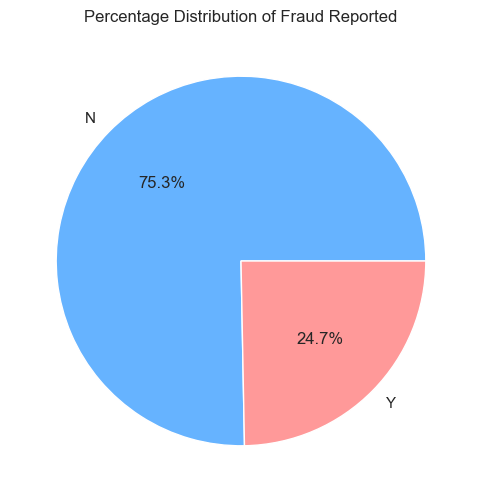

Interpretation:
The target variable 'fraud_reported' has 247 instances of fraud reported and 753 instances where fraud was not reported.
This indicates that 24.7% of the claims are fraudulent, and 75.3% are non-fraudulent.


In [146]:
#exploring Target Variable


# Missing Value Analysis
missing_values = df['fraud_reported'].isnull().sum()
print(f"Missing values in 'fraud_reported': {missing_values}")
print("\n")

# Frequency Distribution
value_counts = df['fraud_reported'].value_counts()
print("Frequency of each category in 'fraud_reported':")
print(value_counts)
print("\n")

# Percentage Distribution
percentage_distribution = (df['fraud_reported'].value_counts(normalize=True) * 100).round(2)
print("Percentage distribution of 'fraud_reported':")
print(percentage_distribution)
print("\n")



# Pie Chart Visualization
plt.figure(figsize=(6, 6))
df['fraud_reported'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Percentage Distribution of Fraud Reported')
plt.ylabel('')
plt.show()

# Interpretation 
print("Interpretation:")
print(f"The target variable 'fraud_reported' has {value_counts['Y']} instances of fraud reported and {value_counts['N']} instances where fraud was not reported.")
print(f"This indicates that {percentage_distribution['Y']}% of the claims are fraudulent, and {percentage_distribution['N']}% are non-fraudulent.")



 Univariate Analysis on Numerical columns

Descriptive Statistics: Provides a snapshot of the data's central tendency and dispersion.


Outlier Detection: Helps identify unusual data points that may need investigation or treatment.

Shapiro's Normality Test: Determines if the data distribution deviates from normality, informing the choice of statistical tests and models.

Skewness: Knowing the skewness helps in choosing the appropriate measure of central tendency for data interpretation.

Ensure that statistical assumptions are met.

Decide on appropriate statistical tests and models to be applied

Improve the validity and reliability of analytical results.

Positive Skew : The mean is greater than the median.
Negative Skew : The mean is less than the median.

Kurtosis: provides insights into the likelihood of extreme outcomes, which is essential for accurate data interpretation.


Visualizations: Offer intuitive insights into the data distribution, variability, and potential anomalies.

In [147]:


def univariate_analysis(df, cols=None, output_dir=None):
    """
    Performs comprehensive univariate analysis on numerical features.

    Parameters:
    - df: pandas DataFrame containing the data.
    - cols: list of columns to analyze. If None, all numerical columns are analyzed.
    - output_dir: directory to save plots. If None, plots are displayed but not saved.

    Returns:
    - analysis_results: A dictionary containing analysis results for each column.
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    analysis_results = {}
    
    for col in cols:
        print(f"\nAnalyzing '{col}':")
        data = df[col].dropna()
        results = {}
        
        # Descriptive Statistics
        results['count'] = data.count()
        results['mean'] = data.mean()
        results['median'] = data.median()
        results['mode'] = data.mode().tolist()
        results['std_dev'] = data.std()
        results['variance'] = data.var()
        results['min'] = data.min()
        results['max'] = data.max()
        results['range'] = data.max() - data.min()
        results['skewness'] = data.skew()
        results['kurtosis'] = data.kurtosis()
        results['quantiles'] = data.quantile([0.25, 0.5, 0.75]).to_dict()
        
        # Distribution
        # Outlier Detection using IQR
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        results['num_outliers'] = len(outliers)
        results['outlier_values'] = outliers.tolist()
        
        # Normality Test
        # If p > 0.05, data is considered normally distributed
        if len(data) >= 3 and len(data) <= 5000:
            stat, p_value = stats.shapiro(data)
            results['normality_test'] = 'Shapiro-Wilk'
        else:
            stat, p_value = stats.normaltest(data)
            results['normality_test'] = 'D\'Agostino and Pearson'
        results['normality_pvalue'] = p_value
        results['is_normal_distribution'] = p_value > 0.05  
        
        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        
        # Histogram and KDE
        sns.histplot(data, kde=True, ax=axes[0, 0], color='skyblue')
        axes[0, 0].set_title(f'Histogram of {col}')
        
        # Boxplot
        sns.boxplot(x=data, ax=axes[0, 1], color='lightgreen')
        axes[0, 1].set_title(f'Boxplot of {col}')
        
        # QQ Plot
        stats.probplot(data, dist="norm", plot=axes[1, 0])
        axes[1, 0].set_title(f'QQ Plot of {col}')
        
        # Violin Plot
        sns.violinplot(x=data, ax=axes[1, 1], color='lightcoral')
        axes[1, 1].set_title(f'Violin Plot of {col}')
        
        plt.tight_layout()
        
        if output_dir:
            plt.savefig(f'{output_dir}/{col}_analysis.png')
            plt.close()
        else:
            plt.show()
        
        # Store the results
        analysis_results[col] = results
        
        # Print the summary
        summary_df = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
        
        
    return print(summary_df)



Analyzing 'age':


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


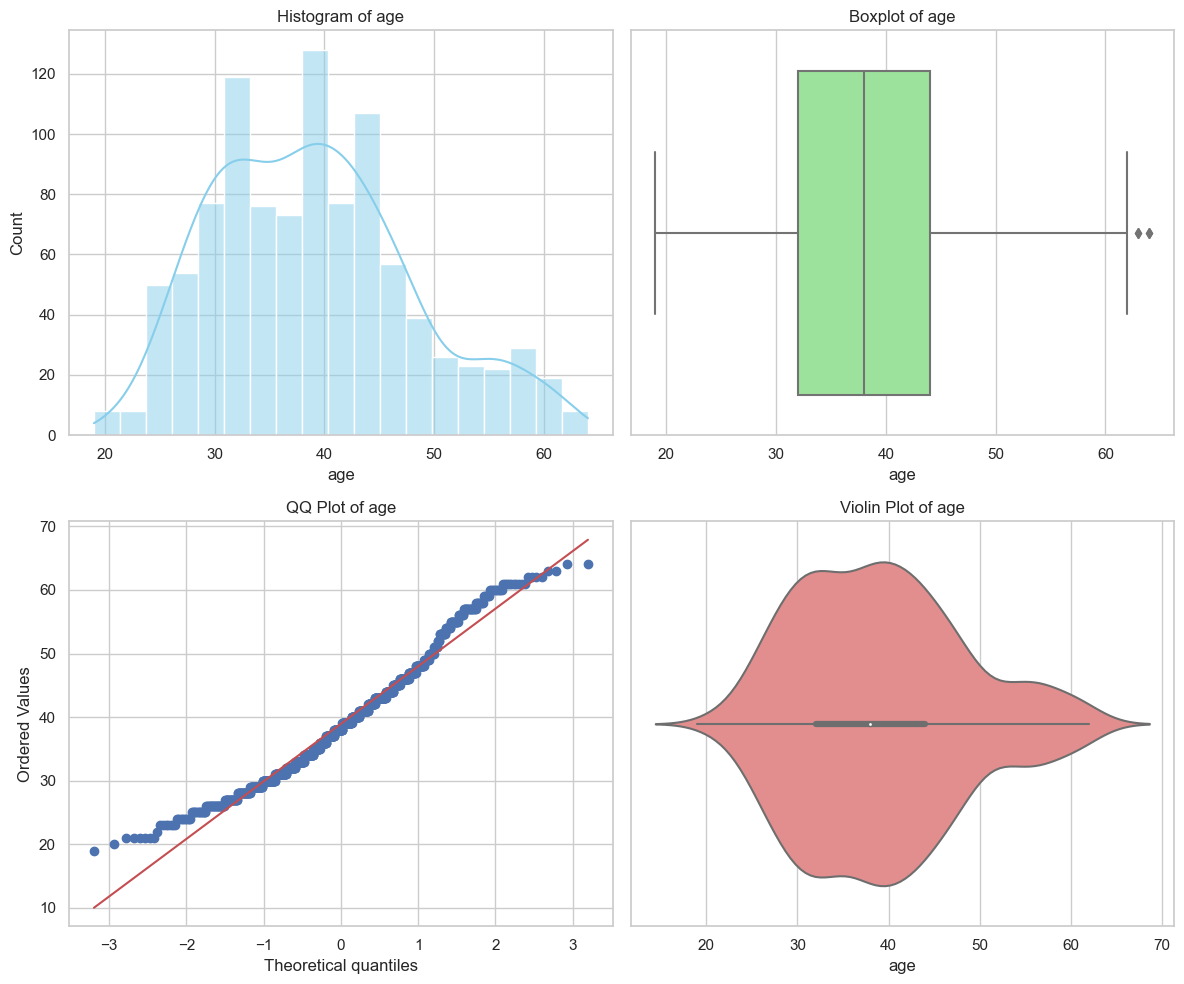

                                                      Value
count                                                  1000
mean                                                 38.948
median                                                 38.0
mode                                                   [43]
std_dev                                            9.140287
variance                                          83.544841
min                                                      19
max                                                      64
range                                                    45
skewness                                           0.478988
kurtosis                                          -0.260255
quantiles               {0.25: 32.0, 0.5: 38.0, 0.75: 44.0}
num_outliers                                              4
outlier_values                             [64, 63, 64, 63]
normality_test                                 Shapiro-Wilk
normality_pvalue                        

In [148]:
#Using the function

univariate_analysis(df, cols=['age'], output_dir=None)


Analyzing 'months_as_customer':


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


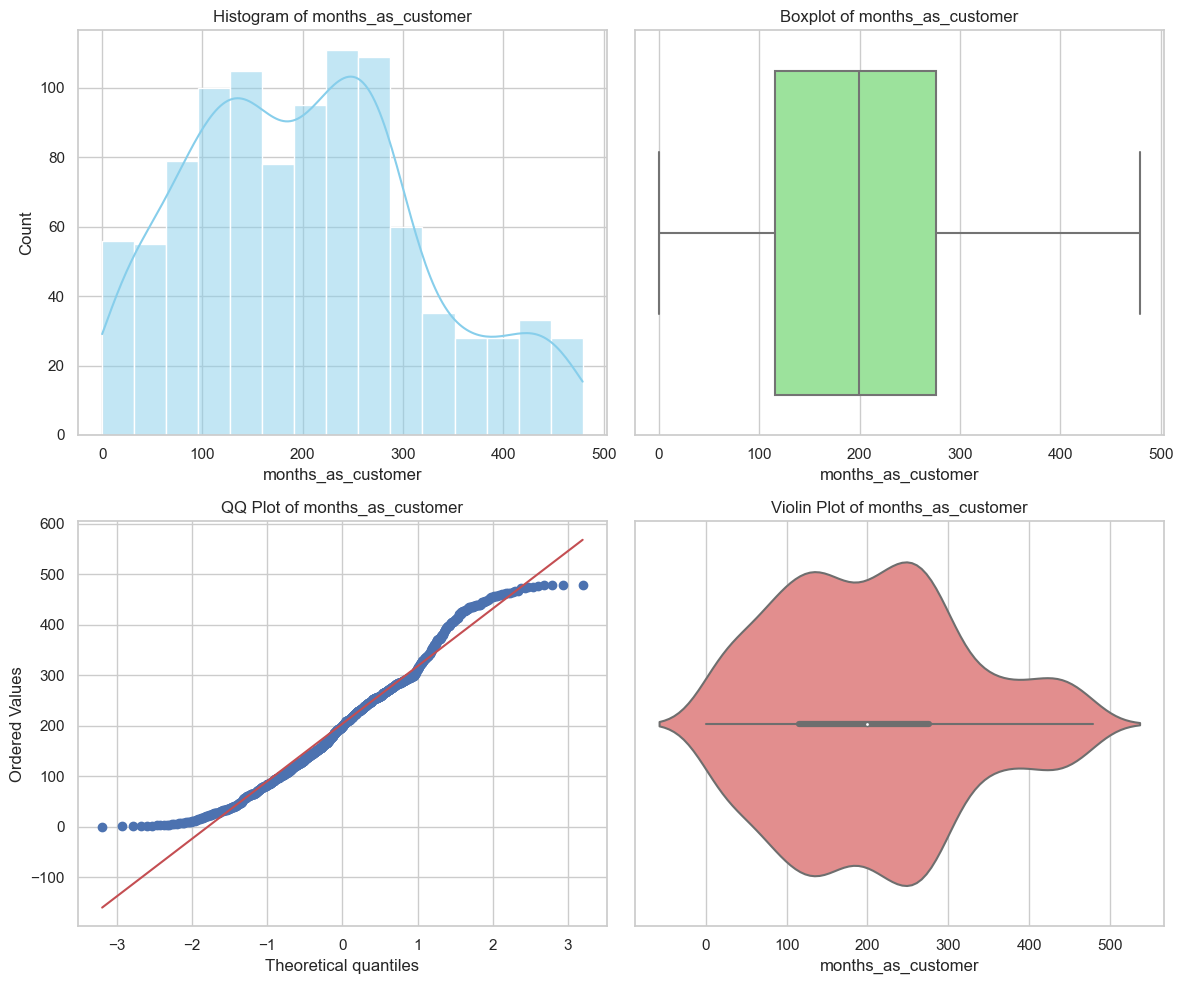

                                                           Value
count                                                       1000
mean                                                     203.954
median                                                     199.5
mode                                                       [194]
std_dev                                               115.113174
variance                                            13251.042927
min                                                            0
max                                                          479
range                                                        479
skewness                                                0.362177
kurtosis                                               -0.485428
quantiles               {0.25: 115.75, 0.5: 199.5, 0.75: 276.25}
num_outliers                                                   0
outlier_values                                                []
normality_test           

In [149]:
univariate_analysis(df, cols=['months_as_customer'], output_dir=None)


Analyzing 'policy_number':


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


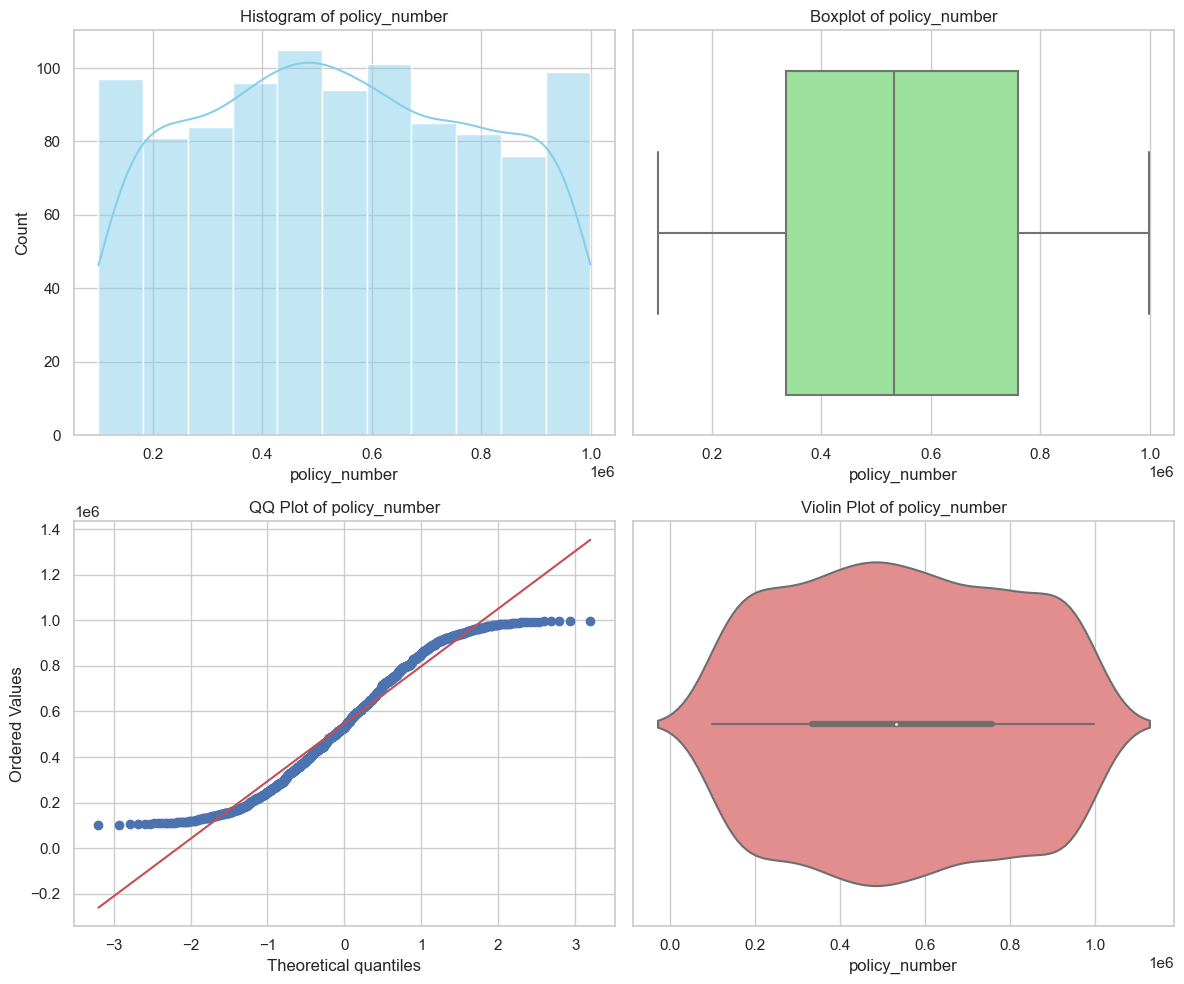

                                                                    Value
count                                                                1000
mean                                                           546238.648
median                                                           533135.0
mode                    [100804, 101421, 104594, 106186, 106873, 10718...
std_dev                                                     257063.005276
variance                                               66081388681.315422
min                                                                100804
max                                                                999435
range                                                              898631
skewness                                                         0.038991
kurtosis                                                        -1.132638
quantiles               {0.25: 335980.25, 0.5: 533135.0, 0.75: 759099.75}
num_outliers                          

In [150]:
univariate_analysis(df, cols=['policy_number'], output_dir=None)


Analyzing 'policy_deductable':


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


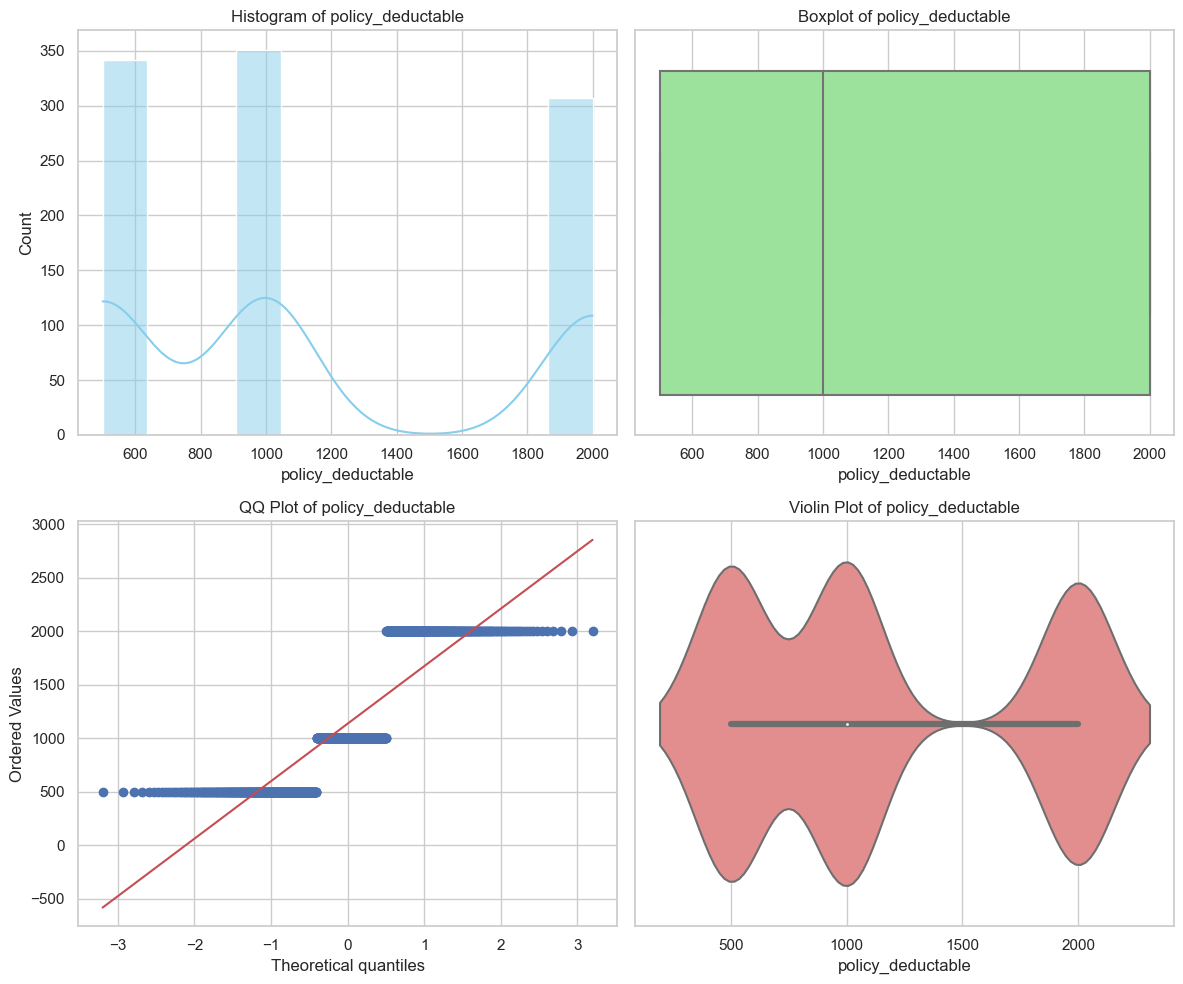

                                                           Value
count                                                       1000
mean                                                      1136.0
median                                                    1000.0
mode                                                      [1000]
std_dev                                               611.864673
variance                                           374378.378378
min                                                          500
max                                                         2000
range                                                       1500
skewness                                                0.477887
kurtosis                                               -1.376943
quantiles               {0.25: 500.0, 0.5: 1000.0, 0.75: 2000.0}
num_outliers                                                   0
outlier_values                                                []
normality_test           

In [151]:
univariate_analysis(df, cols=['policy_deductable'], output_dir=None)


Analyzing 'umbrella_limit':


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


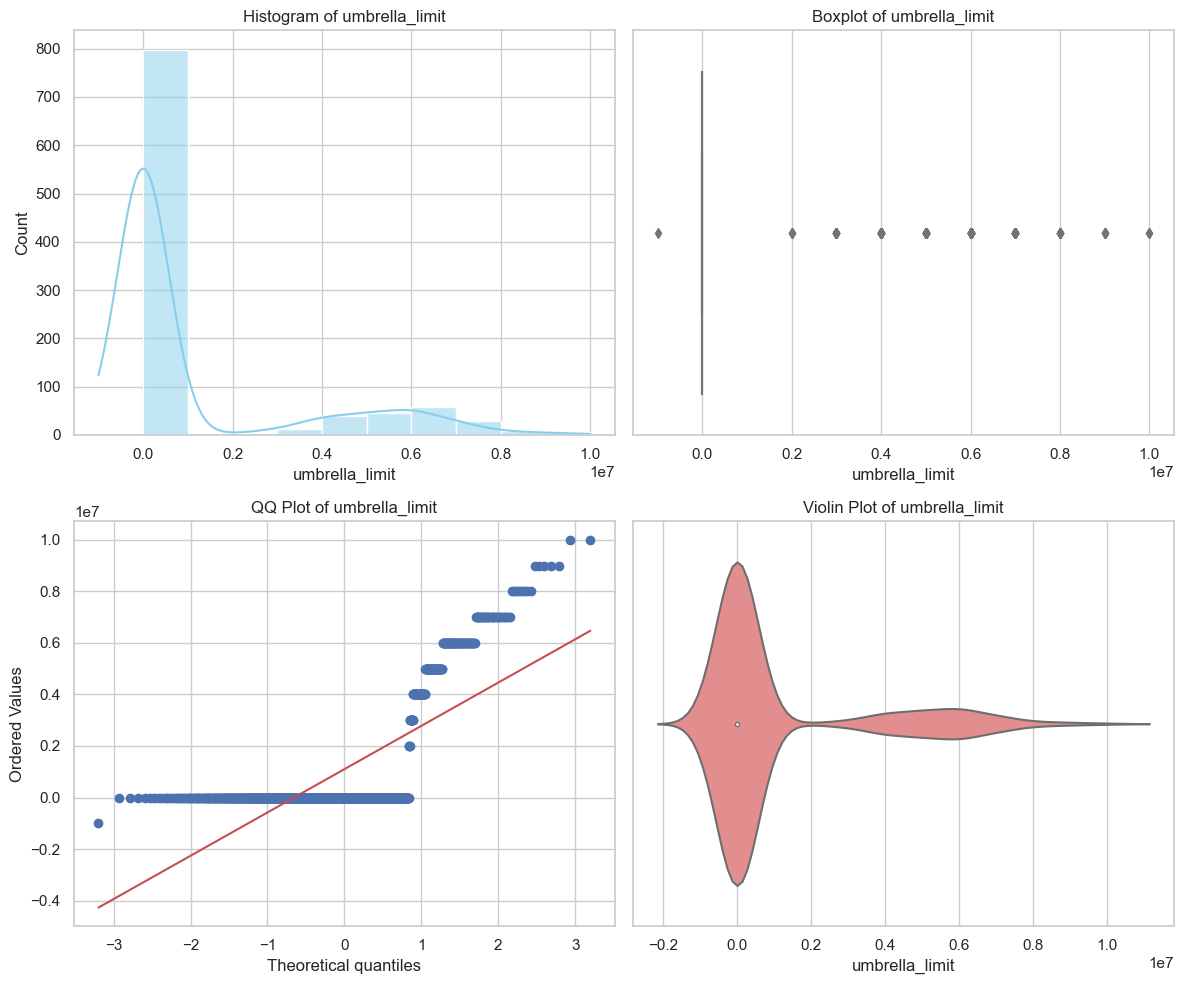

                                                                    Value
count                                                                1000
mean                                                            1101000.0
median                                                                0.0
mode                                                                  [0]
std_dev                                                    2297406.598118
variance                                             5278077077077.077148
min                                                              -1000000
max                                                              10000000
range                                                            11000000
skewness                                                         1.806712
kurtosis                                                         1.792077
quantiles                                {0.25: 0.0, 0.5: 0.0, 0.75: 0.0}
num_outliers                          

In [152]:
univariate_analysis(df, cols=['umbrella_limit'], output_dir=None)


Analyzing 'policy_annual_premium':


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


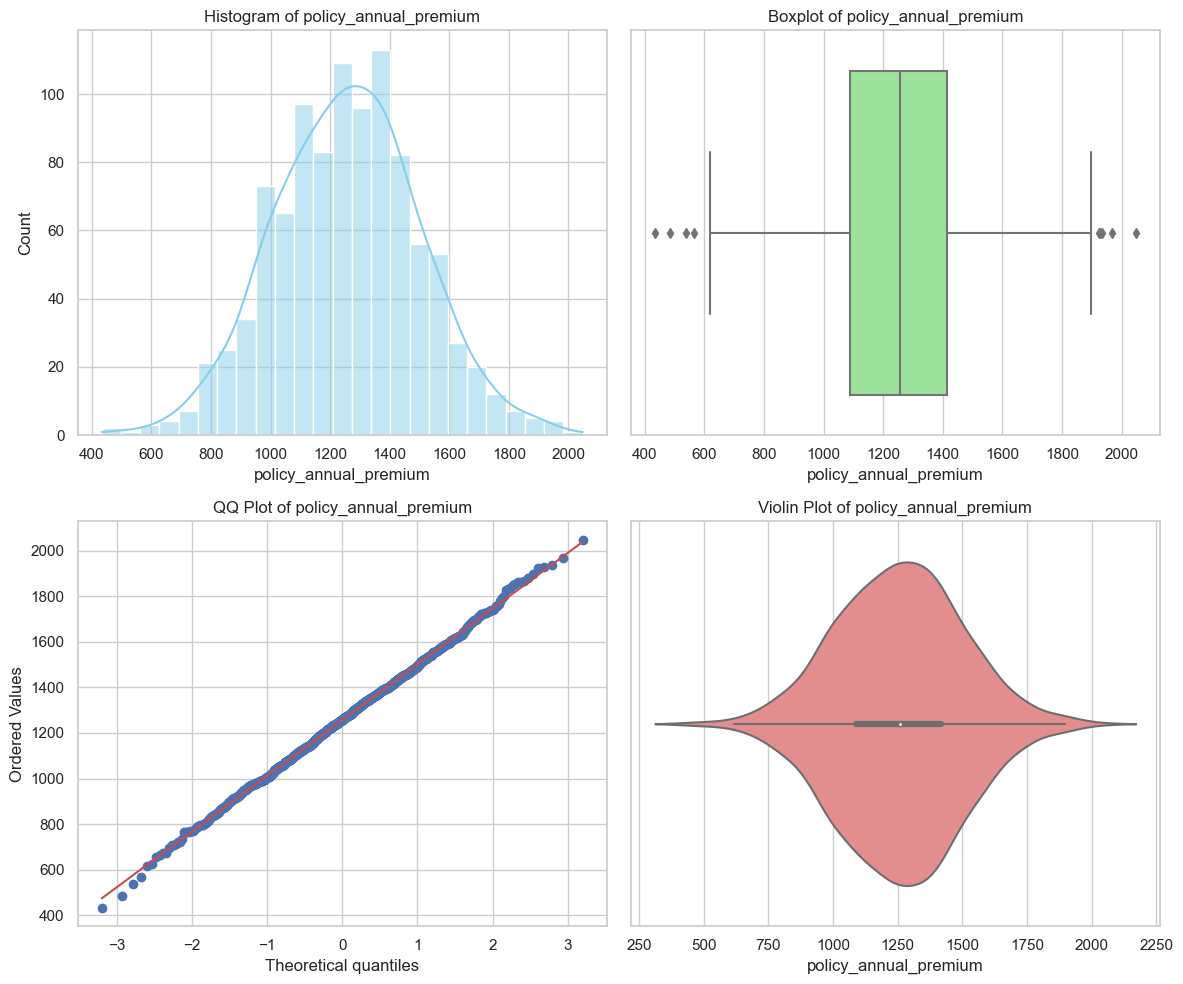

                                                                    Value
count                                                                1000
mean                                                           1256.40615
median                                                             1257.2
mode                    [1073.83, 1074.07, 1215.36, 1281.25, 1362.87, ...
std_dev                                                        244.167395
variance                                                     59617.716762
min                                                                433.33
max                                                               2047.59
range                                                             1614.26
skewness                                                         0.004402
kurtosis                                                         0.073889
quantiles               {0.25: 1089.6075, 0.5: 1257.1999999999998, 0.7...
num_outliers                          

In [153]:
univariate_analysis(df, cols=['policy_annual_premium'], output_dir=None)


Analyzing 'capital-gains':


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


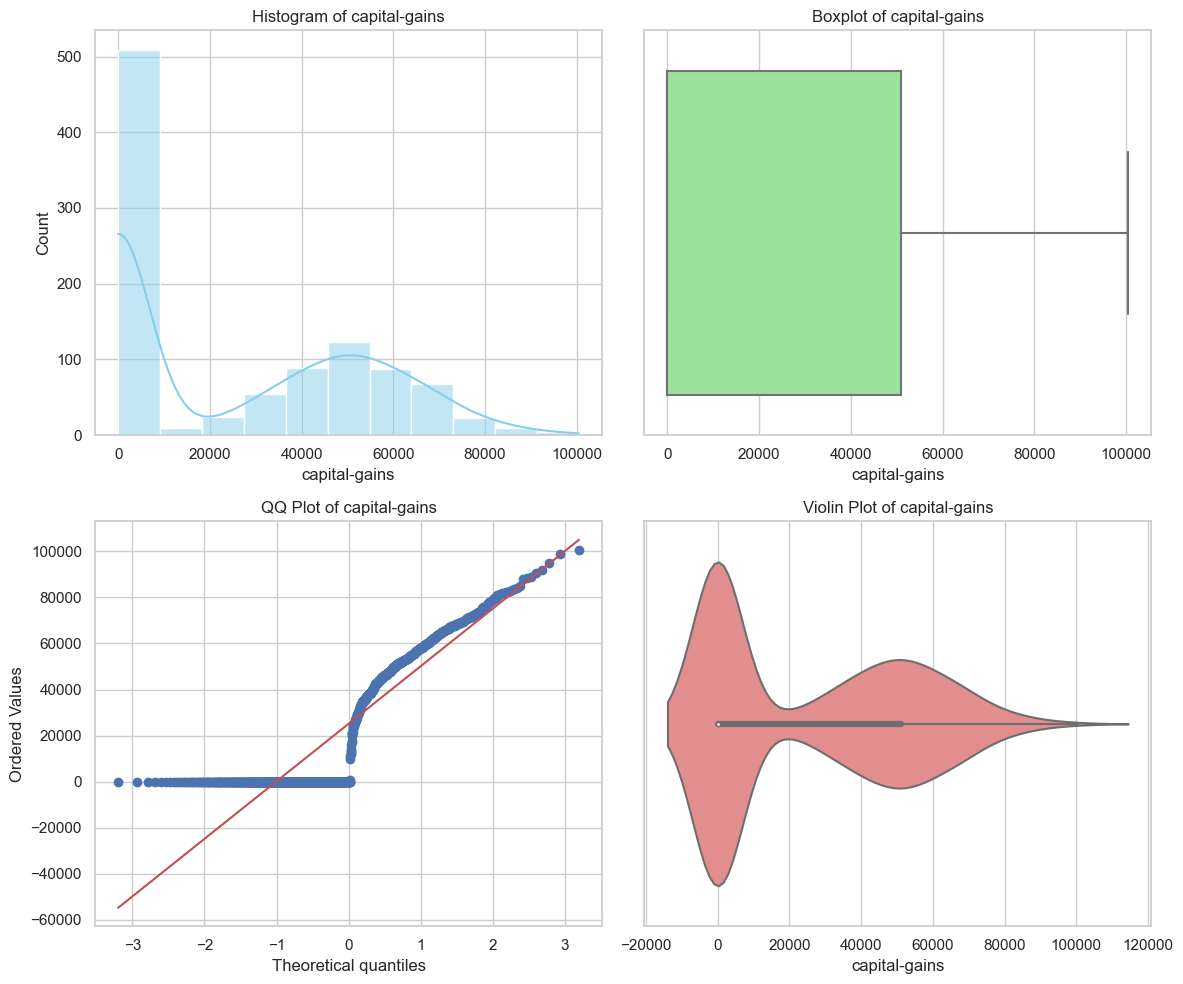

                                                       Value
count                                                   1000
mean                                                 25126.1
median                                                   0.0
mode                                                     [0]
std_dev                                         27872.187708
variance                                    776858847.637633
min                                                        0
max                                                   100500
range                                                 100500
skewness                                             0.47885
kurtosis                                           -1.276704
quantiles               {0.25: 0.0, 0.5: 0.0, 0.75: 51025.0}
num_outliers                                               0
outlier_values                                            []
normality_test                                  Shapiro-Wilk
normality_pvalue        

In [154]:
univariate_analysis(df, cols=['capital-gains'], output_dir=None)


Analyzing 'capital-loss':


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


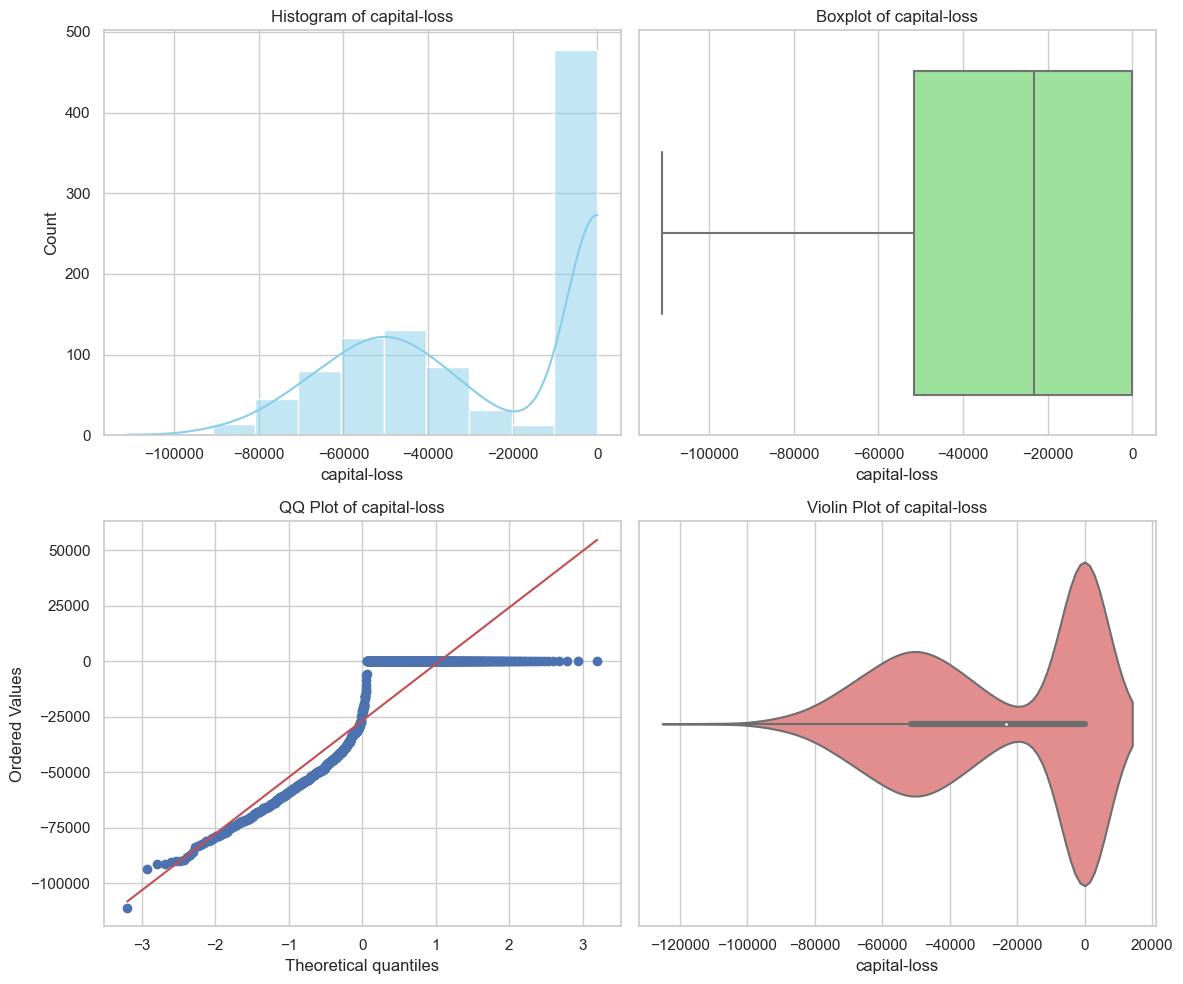

                                                             Value
count                                                         1000
mean                                                      -26793.7
median                                                    -23250.0
mode                                                           [0]
std_dev                                               28104.096686
variance                                          789840250.560544
min                                                        -111100
max                                                              0
range                                                       111100
skewness                                                 -0.391472
kurtosis                                                 -1.313875
quantiles               {0.25: -51500.0, 0.5: -23250.0, 0.75: 0.0}
num_outliers                                                     0
outlier_values                                                

In [155]:
univariate_analysis(df, cols=['capital-loss'], output_dir=None)

<Axes: xlabel='insured_zip', ylabel='count'>

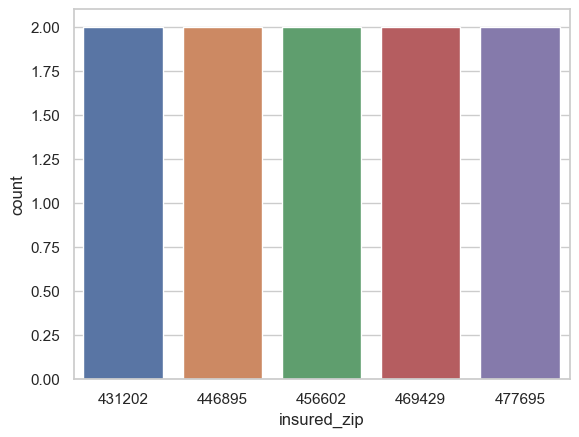

In [156]:

# zip distribution

"""

Frequency Distribution: Helps identify which zip codes have the highest number of policies.



"""

top_zip_codes = df['insured_zip'].value_counts().nlargest(5).index

sns.countplot(x='insured_zip', data=df[df['insured_zip'].isin(top_zip_codes)])



Univariate Analysis on Categorical Columns(Noting High Cardinality)

For categorical variables with a large number of unique categories , displaying all categories may not be practical the visualization to the top 10 most frequent categories in such cases.


Missing Values: Indicates if any data cleaning is needed.

Unique Values: Helps understand the diversity within the variable.

Frequency Counts: Shows how the data is distributed across different categories.



Categorical columns to analyze:
['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model']


Analysis of 'policy_state':
---------------------------
Missing values: 0
Number of unique values: 3

Unique values and their counts:
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64




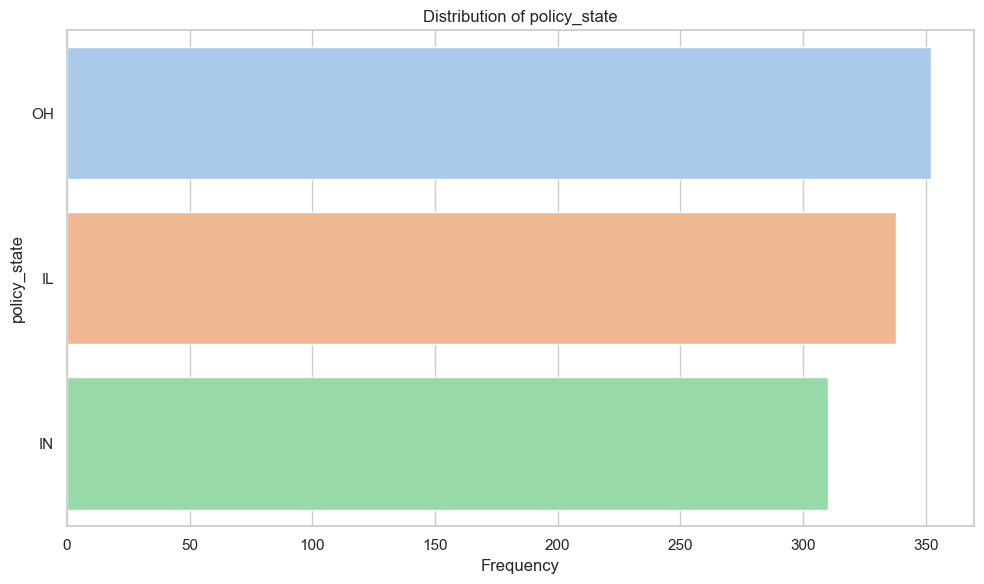




Analysis of 'policy_csl':
-------------------------
Missing values: 0
Number of unique values: 3

Unique values and their counts:
policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64




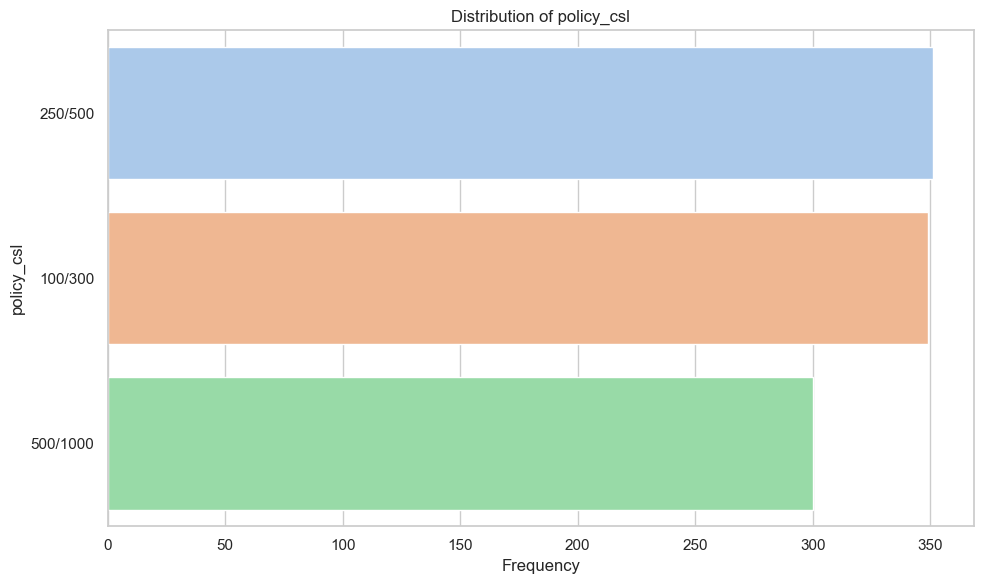




Analysis of 'insured_sex':
--------------------------
Missing values: 0
Number of unique values: 2

Unique values and their counts:
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64




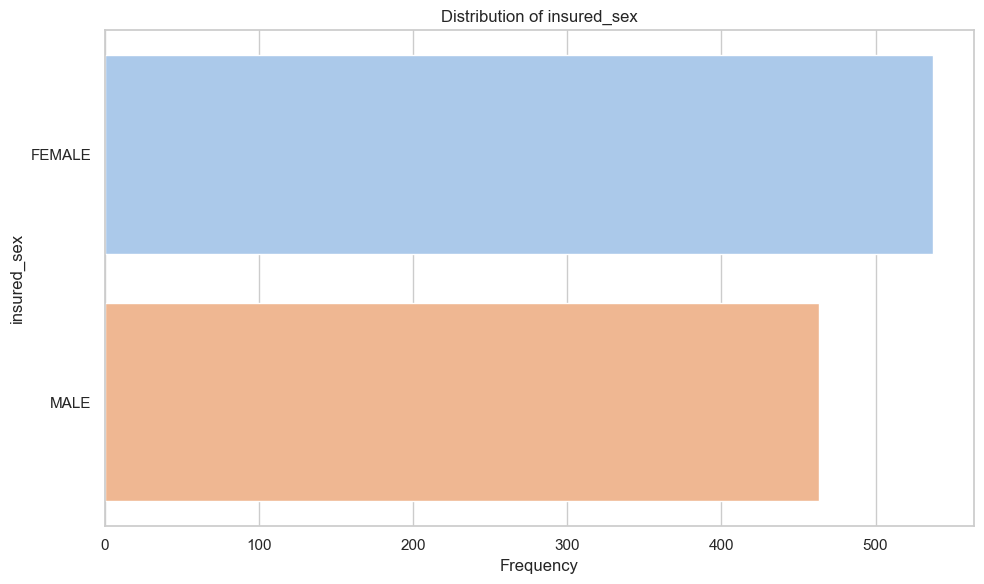




Analysis of 'insured_education_level':
--------------------------------------
Missing values: 0
Number of unique values: 7

Unique values and their counts:
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64




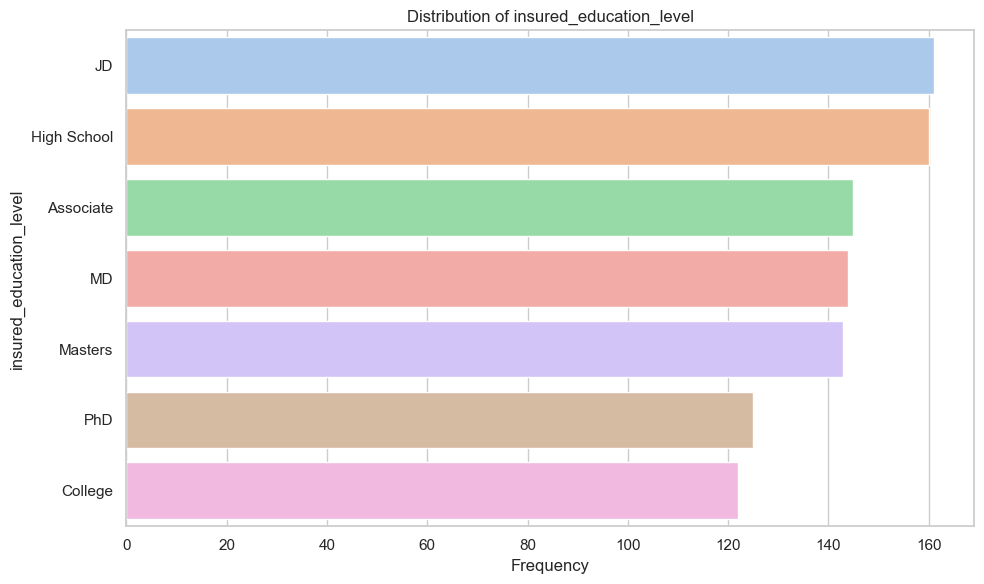




Analysis of 'insured_occupation':
---------------------------------
Missing values: 0
Number of unique values: 14

Unique values and their counts:
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64




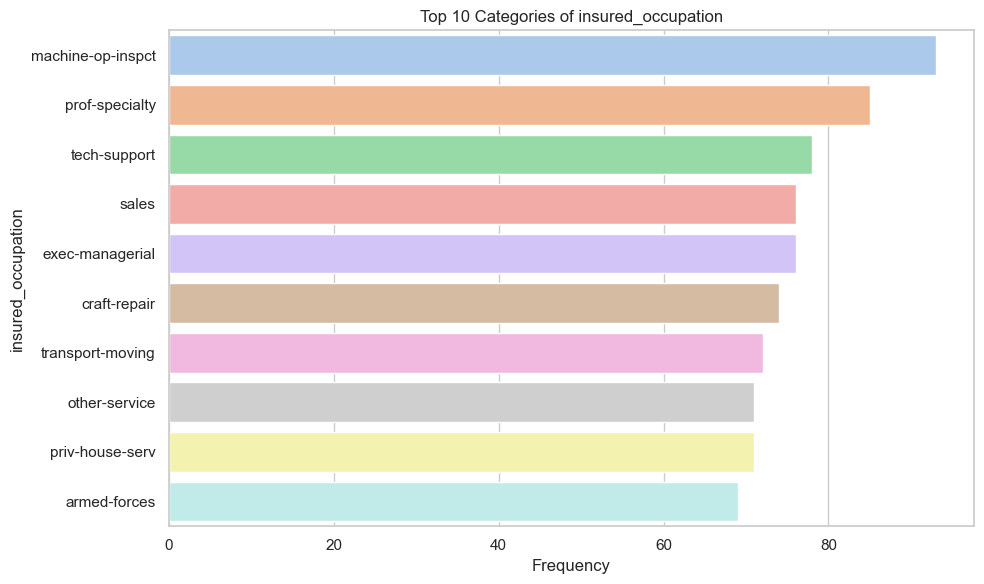




Analysis of 'insured_hobbies':
------------------------------
Missing values: 0
Number of unique values: 20

Unique values and their counts:
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: count, dtype: int64




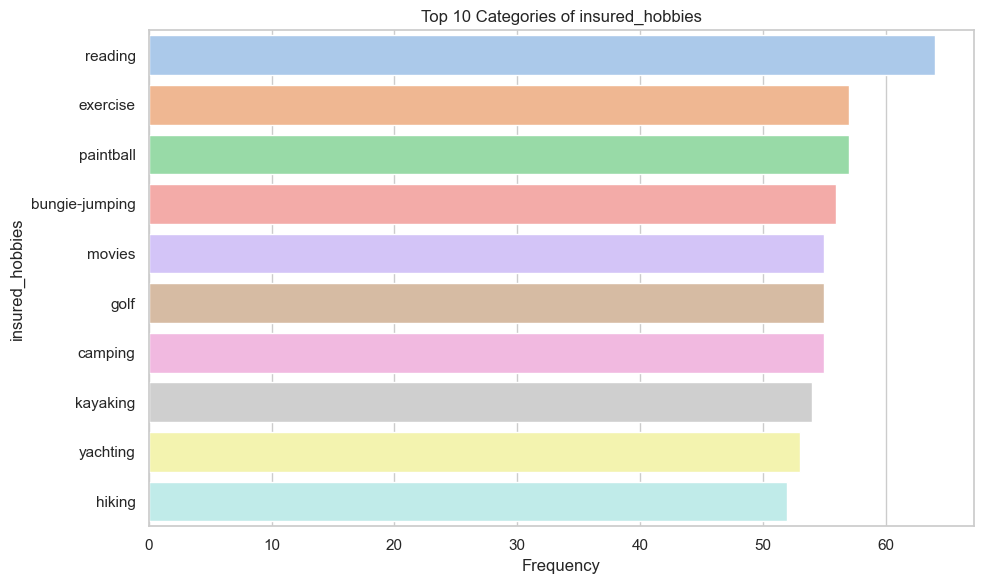




Analysis of 'insured_relationship':
-----------------------------------
Missing values: 0
Number of unique values: 6

Unique values and their counts:
insured_relationship
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: count, dtype: int64




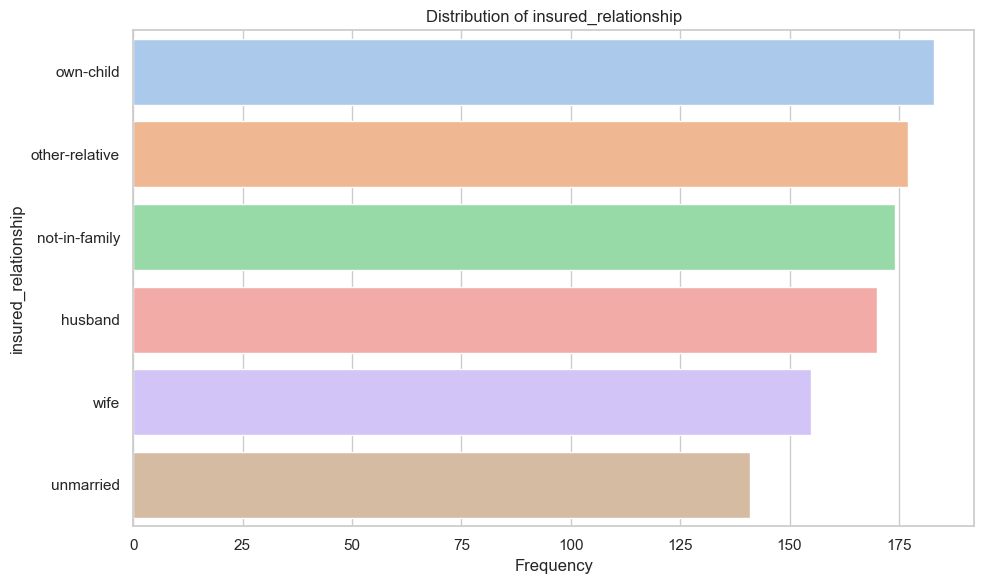




Analysis of 'incident_type':
----------------------------
Missing values: 0
Number of unique values: 4

Unique values and their counts:
incident_type
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: count, dtype: int64




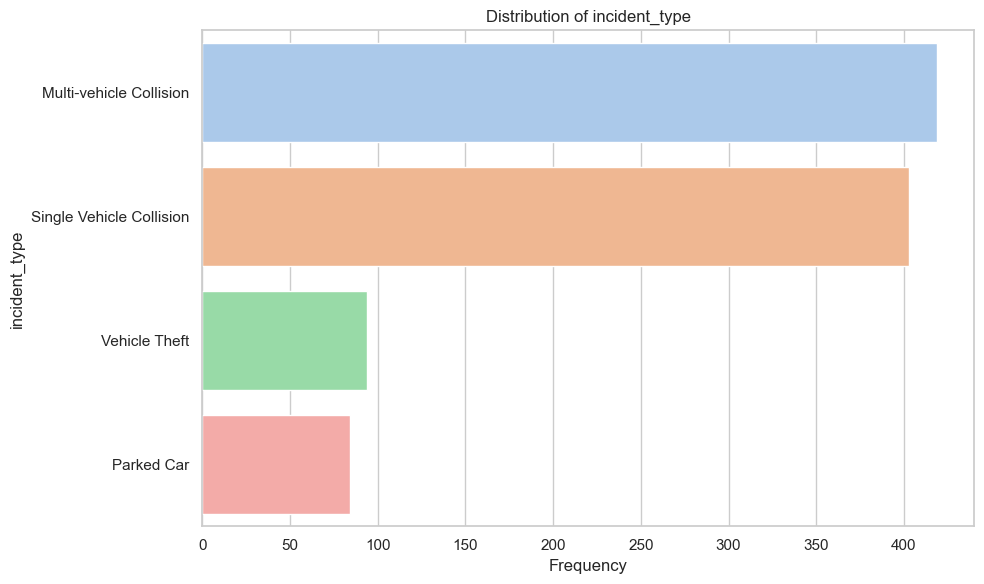




Analysis of 'collision_type':
-----------------------------
Missing values: 0
Number of unique values: 4

Unique values and their counts:
collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64




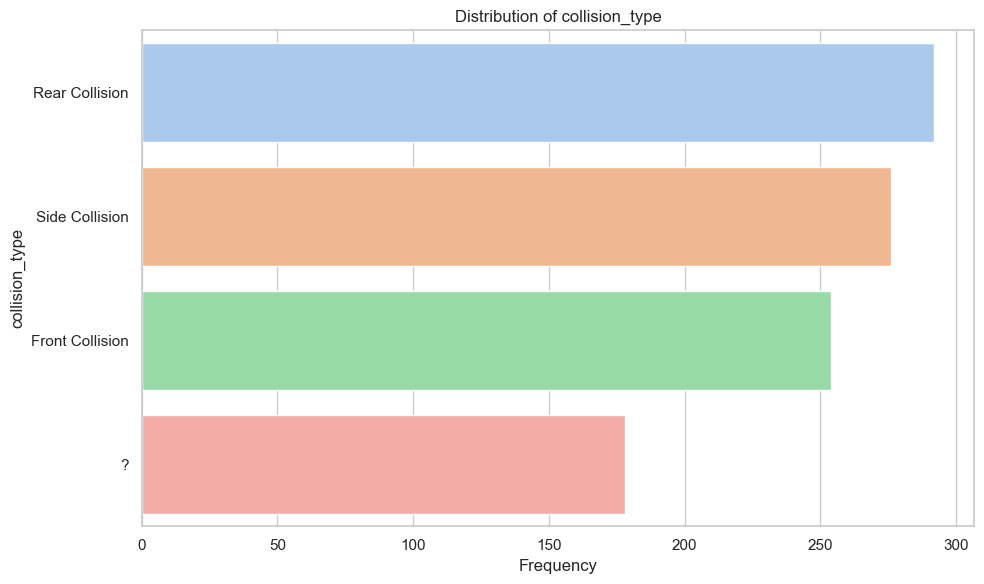




Analysis of 'incident_severity':
--------------------------------
Missing values: 0
Number of unique values: 4

Unique values and their counts:
incident_severity
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: count, dtype: int64




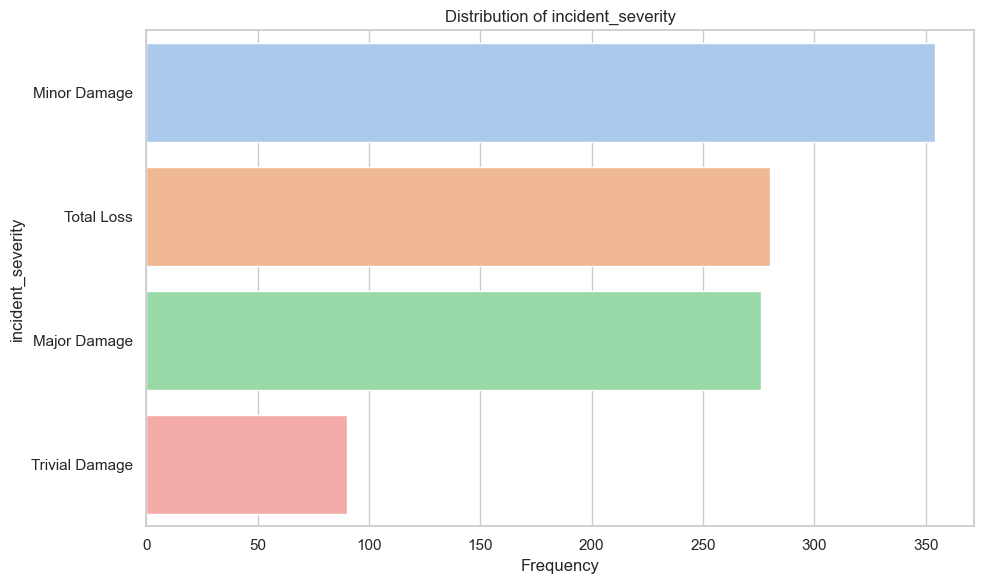




Analysis of 'authorities_contacted':
------------------------------------
Missing values: 91
Number of unique values: 4

Unique values and their counts:
authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64




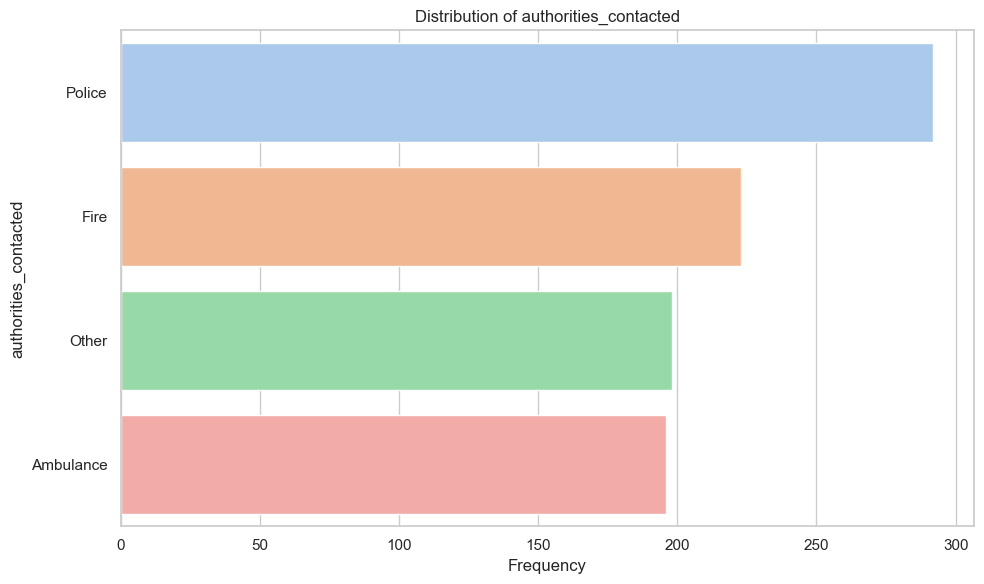




Analysis of 'incident_state':
-----------------------------
Missing values: 0
Number of unique values: 7

Unique values and their counts:
incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64




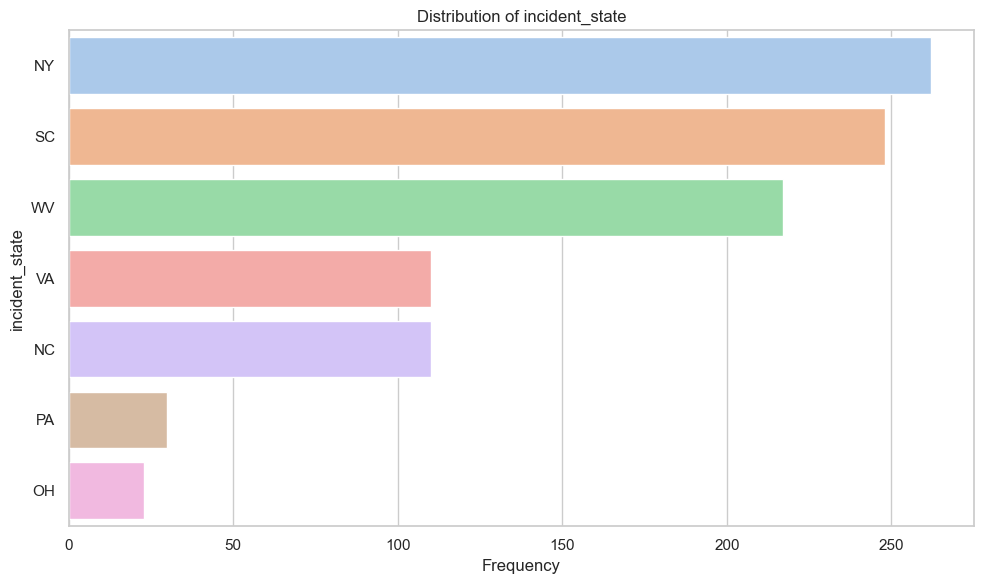




Analysis of 'incident_city':
----------------------------
Missing values: 0
Number of unique values: 7

Unique values and their counts:
incident_city
Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: count, dtype: int64




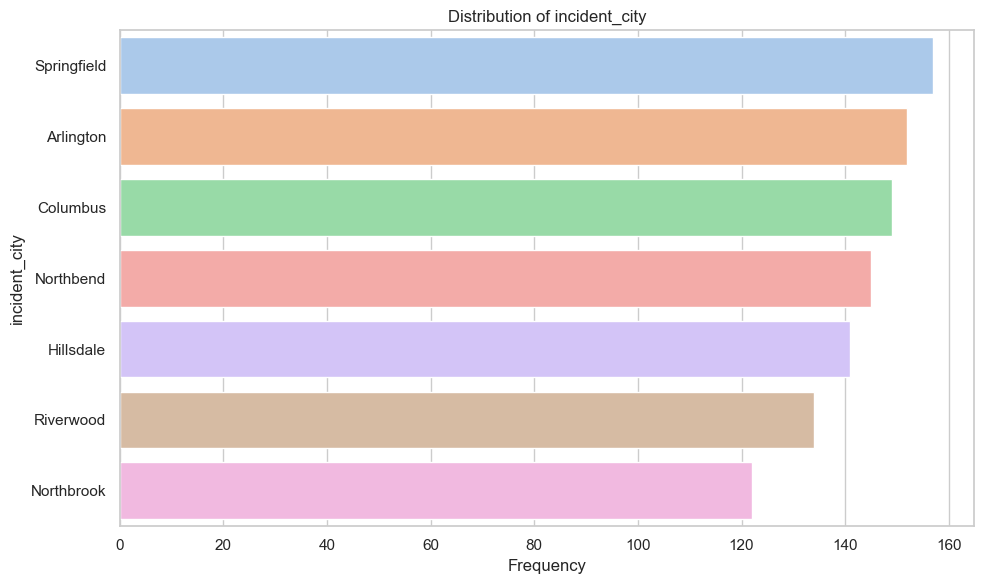




Analysis of 'incident_location':
--------------------------------
Missing values: 0
Number of unique values: 1000

Unique values and their counts:
incident_location
9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: count, Length: 1000, dtype: int64




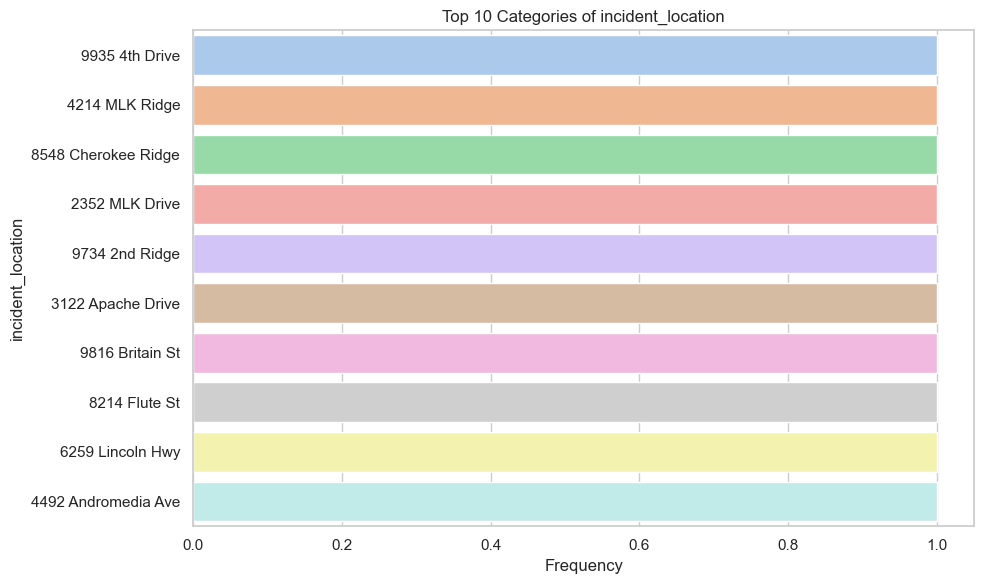




Analysis of 'property_damage':
------------------------------
Missing values: 0
Number of unique values: 3

Unique values and their counts:
property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64




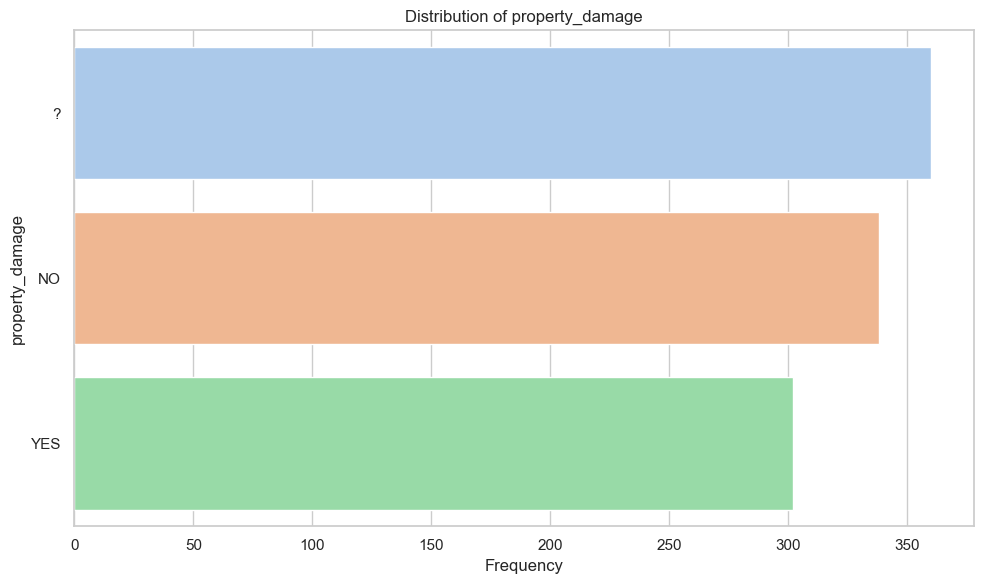




Analysis of 'police_report_available':
--------------------------------------
Missing values: 0
Number of unique values: 3

Unique values and their counts:
police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64




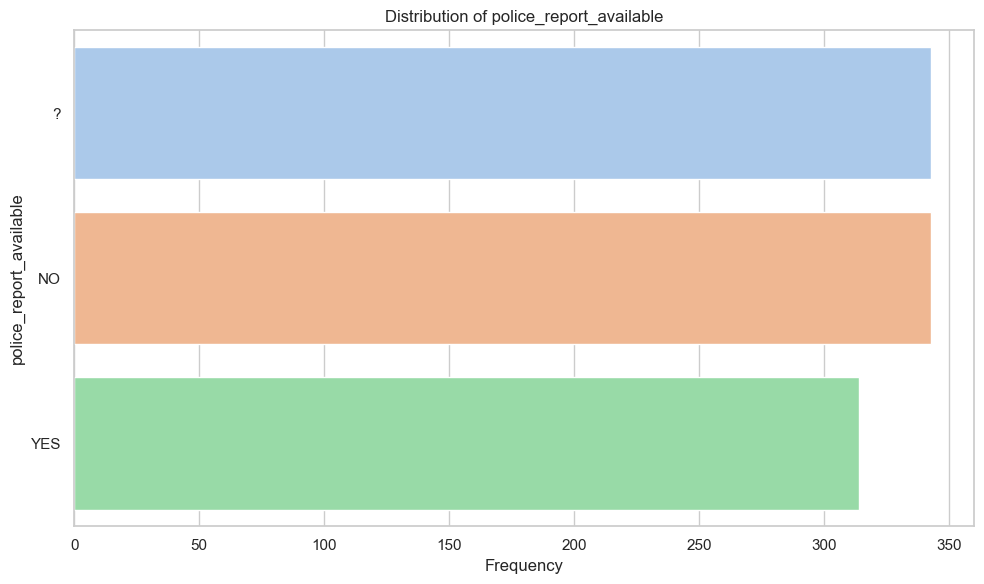




Analysis of 'auto_make':
------------------------
Missing values: 0
Number of unique values: 14

Unique values and their counts:
auto_make
Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: count, dtype: int64




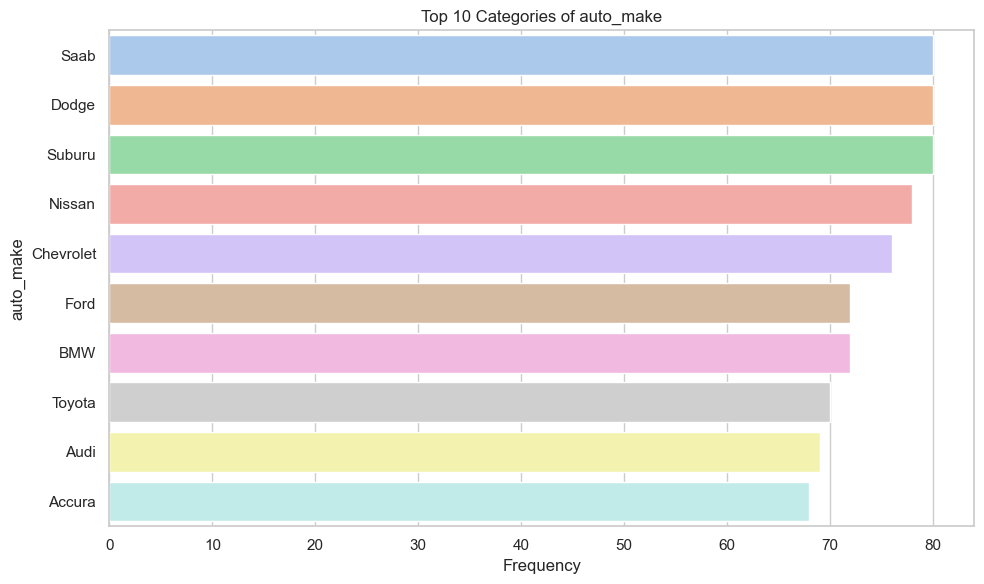




Analysis of 'auto_model':
-------------------------
Missing values: 0
Number of unique values: 39

Unique values and their counts:
auto_model
RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: count, dtype: int64




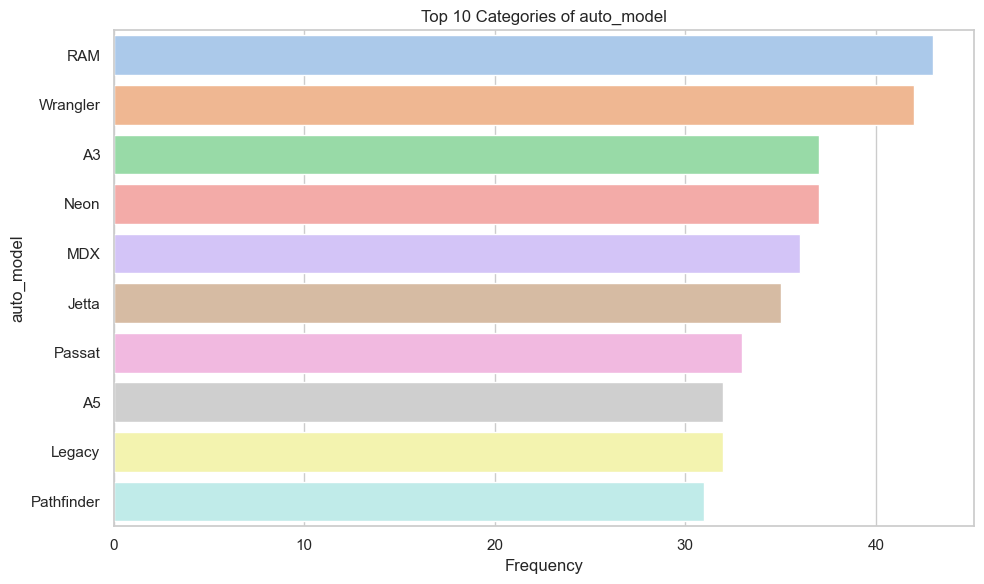

In [157]:

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Exclude date columns 
date_columns = ['policy_bind_date', 'incident_date','fraud_reported']
categorical_columns = [col for col in categorical_columns if col not in date_columns]

print("Categorical columns to analyze:")
print(categorical_columns)
print("\n")

# Set the style for seaborn
sns.set(style="whitegrid")

# Iterating over each categorical column to perform analysis
for col in categorical_columns:
    print(f"Analysis of '{col}':")
    print("-" * (len(col) + 15))
    
    # Check for missing values
    missing_values = df[col].isnull().sum()
    print(f"Missing values: {missing_values}")
    
    # Unique values
    unique_values = df[col].nunique()
    print(f"Number of unique values: {unique_values}")
    print("\nUnique values and their counts:")
    print(df[col].value_counts())
    print("\n")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    # If the number of unique categories is high, display the top 10
    if unique_values > 10:
        top_categories = df[col].value_counts().nlargest(10).index
        sns.countplot(y=col, data=df[df[col].isin(top_categories)], order=top_categories, palette='pastel')
        plt.title(f'Top 10 Categories of {col}')
        plt.ylabel(col)
        plt.xlabel('Frequency')
    else:
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='pastel')
        plt.title(f'Distribution of {col}')
        plt.ylabel(col)
        plt.xlabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    print("\n\n")


Univariate Analysis on Date columns

Missing values in date columns may indicate incomplete records.

Investigate why dates are missing and consider imputing or removing those records based on context.

Date Range to Understand the  Time Span:Knowing the earliest and latest dates helps contextualize the data.

If policy_bind_date ranges from 2015-01-01 to 2016-12-31, the data covers a two-year period.

Distribution of Data  Over Time using Histograms shows how data points are distributed over the time period.Can reveal  any seasonal patterns

Trends:Look for patterns such as seasonality or trends over years.


Analysis of 'policy_bind_date':
-------------------------------
Missing values: 0
Date range: 1990-01-08 00:00:00 to 2015-02-22 00:00:00


Value counts by year for 'policy_bind_date':
policy_bind_date_year
1990    48
1991    55
1992    48
1993    33
1994    41
1995    39
1996    43
1997    44
1998    30
1999    40
2000    31
2001    41
2002    50
2003    37
2004    36
2005    40
2006    41
2007    40
2008    33
2009    43
2010    38
2011    32
2012    36
2013    35
2014    43
2015     3
Name: count, dtype: int64


Value counts by month for 'policy_bind_date':
policy_bind_date_month
1     83
2     90
3     79
4     83
5     69
6     80
7     91
8     93
9     74
10    78
11    85
12    95
Name: count, dtype: int64


Value counts by day of week for 'policy_bind_date':
policy_bind_date_day_name
Wednesday    153
Sunday       153
Saturday     148
Tuesday      138
Friday       137
Thursday     137
Monday       134
Name: count, dtype: int64




c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


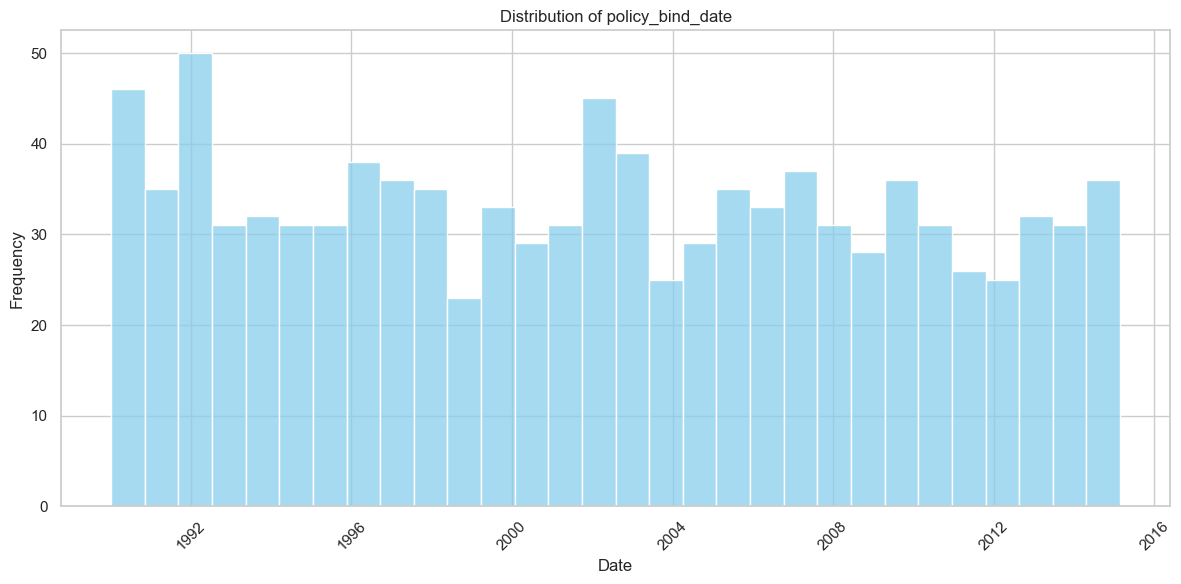

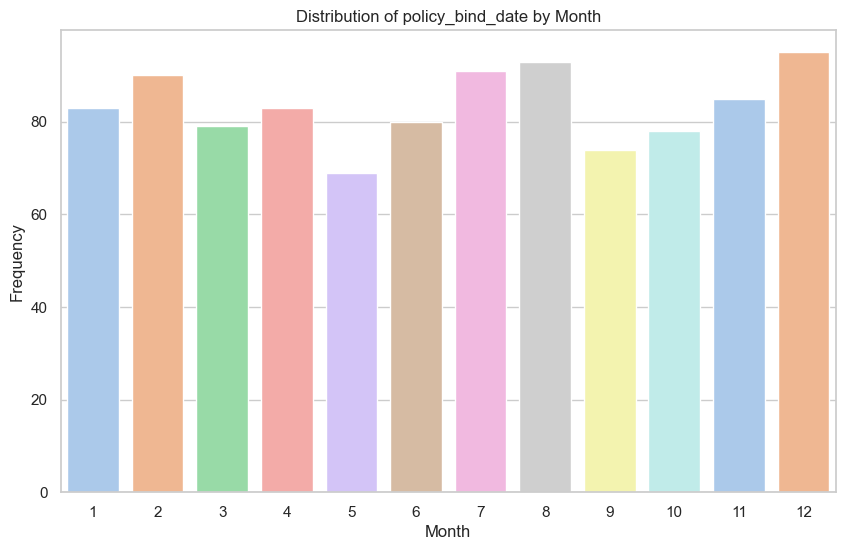

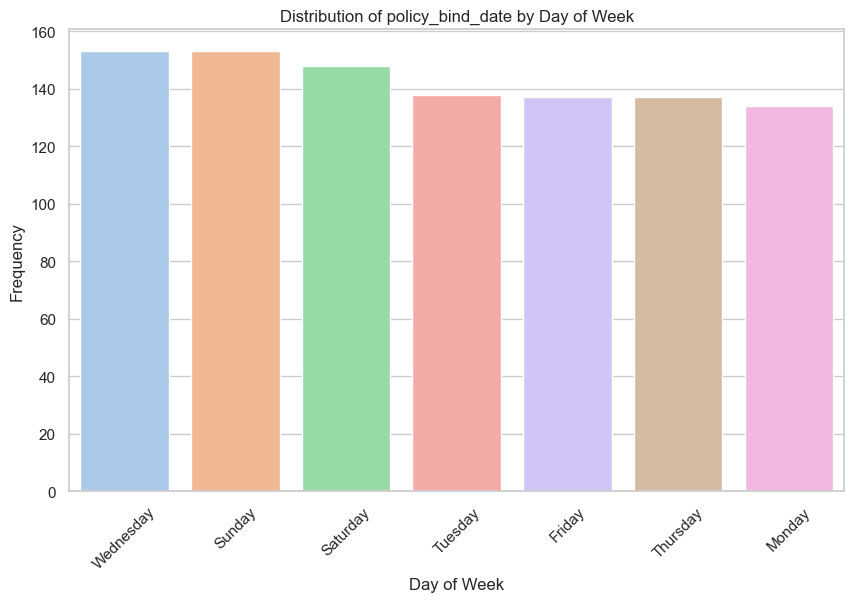

In [158]:


# List of date columns
policy_start_date = ['policy_bind_date']

# Convert date columns to datetime format
for col in policy_start_date:
    df[col] = pd.to_datetime(df[col], errors='coerce')  

# Iterating  over each date column to perform analysis
for col in policy_start_date:
    print(f"Analysis of '{col}':")
    print("-" * (len(col) + 15))
    
    # Check for missing values
    missing_values = df[col].isnull().sum()
    print(f"Missing values: {missing_values}")
    
    # Basic statistics
    print(f"Date range: {df[col].min()} to {df[col].max()}")
    print("\n")
    
    # Extract date components
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_dayofweek'] = df[col].dt.dayofweek  # Monday=0, Sunday=6
    df[col + '_day_name'] = df[col].dt.day_name()
    
    # Value counts for year, month, day of week
    print(f"Value counts by year for '{col}':")
    print(df[col + '_year'].value_counts().sort_index())
    print("\n")
    
    print(f"Value counts by month for '{col}':")
    print(df[col + '_month'].value_counts().sort_index())
    print("\n")
    
    print(f"Value counts by day of week for '{col}':")
    print(df[col + '_day_name'].value_counts())
    print("\n")
    
    # Visualization
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], bins=30, kde=False, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Date')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Plotting counts by month
    plt.figure(figsize=(10, 6))
    month_counts = df[col + '_month'].value_counts().sort_index()
    sns.barplot(x=month_counts.index, y=month_counts.values, palette='pastel')
    plt.title(f'Distribution of {col} by Month')
    plt.xlabel('Month')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plotting counts by day of week
    plt.figure(figsize=(10, 6))
    day_counts = df[col + '_day_name'].value_counts()
    sns.barplot(x=day_counts.index, y=day_counts.values, palette='pastel')
    plt.title(f'Distribution of {col} by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
    
    print("\n\n")


Summary Statistics of Incident Counts per Date:
count    60.000000
mean     16.666667
std       4.594273
min       7.000000
25%      13.000000
50%      17.000000
75%      19.000000
max      28.000000
Name: count, dtype: float64

First few entries of date_counts:
incident_date
2015-01-01    19
2015-01-02    11
2015-01-03    18
2015-01-04    12
2015-01-05     7
Name: count, dtype: int64


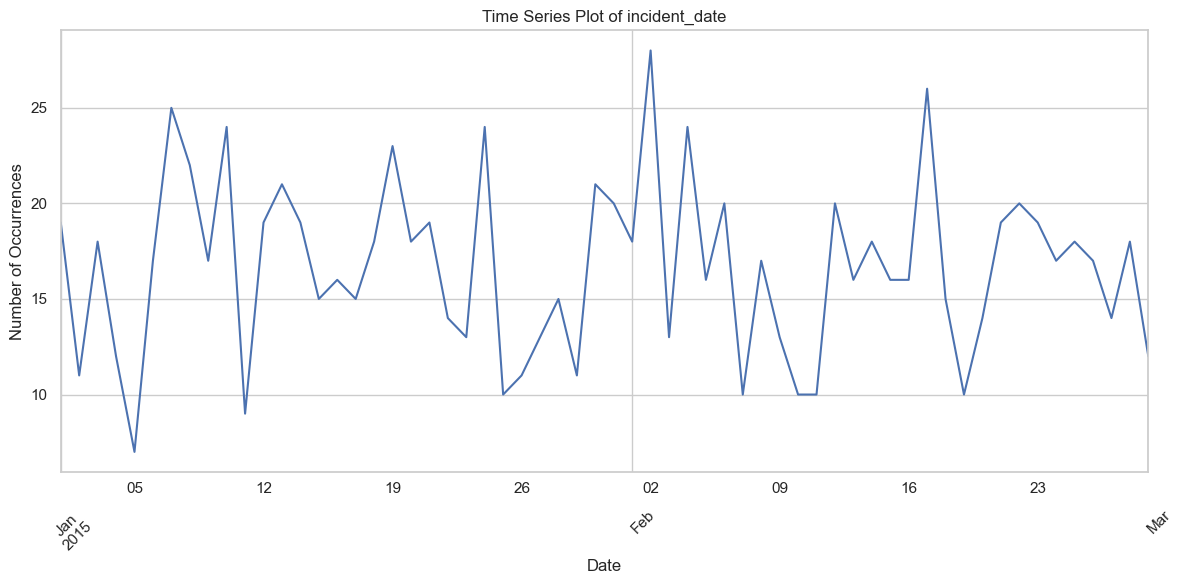


Summary Statistics of Monthly Counts:
count      3.000000
mean     333.333333
std      279.151094
min       12.000000
25%      242.000000
50%      472.000000
75%      494.000000
max      516.000000
dtype: float64


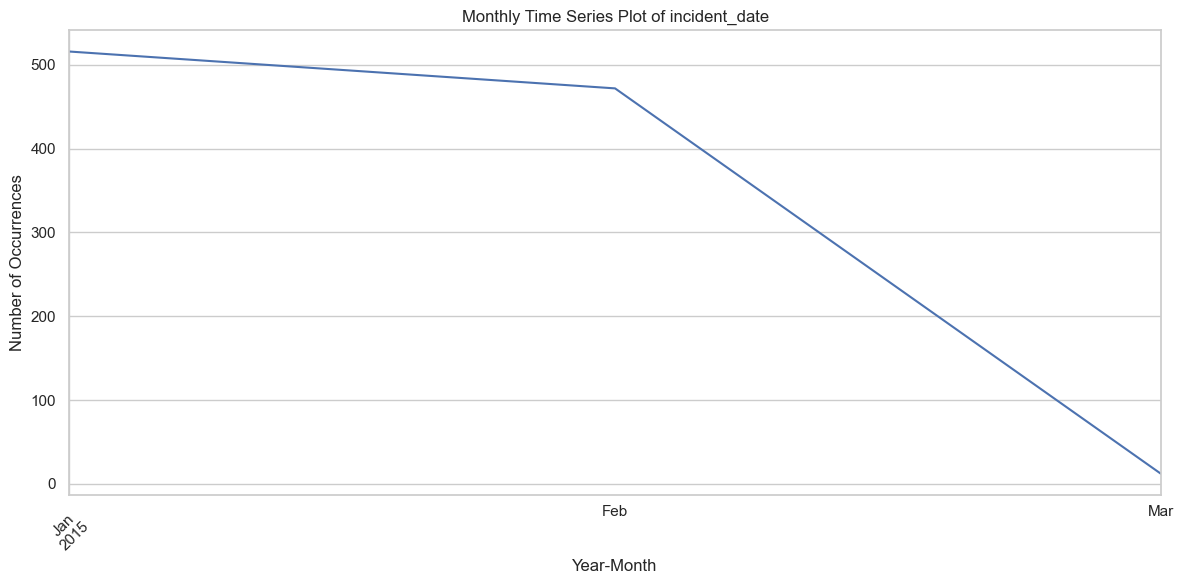


Top 10 Dates with Highest Number of Incidents:
incident_date
2015-01-07    25
2015-01-08    22
2015-01-10    24
2015-01-13    21
2015-01-19    23
2015-01-24    24
2015-01-30    21
2015-02-02    28
2015-02-04    24
2015-02-17    26
Name: count, dtype: int64


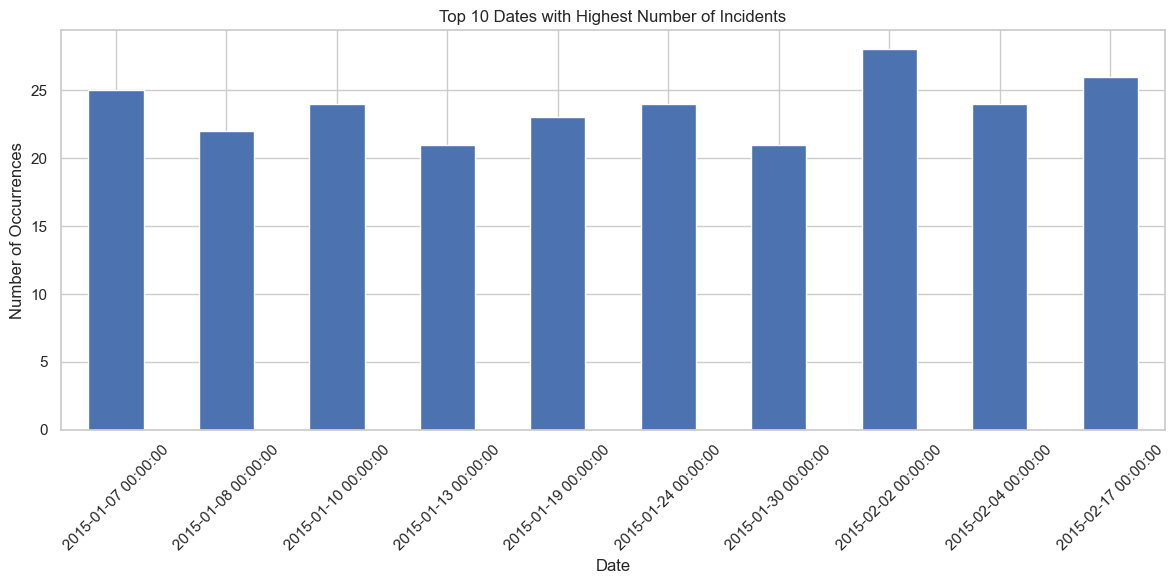


Incident Types on Top 10 Dates:
incident_type
Multi-vehicle Collision     101
Single Vehicle Collision     98
Vehicle Theft                22
Parked Car                   17
Name: count, dtype: int64


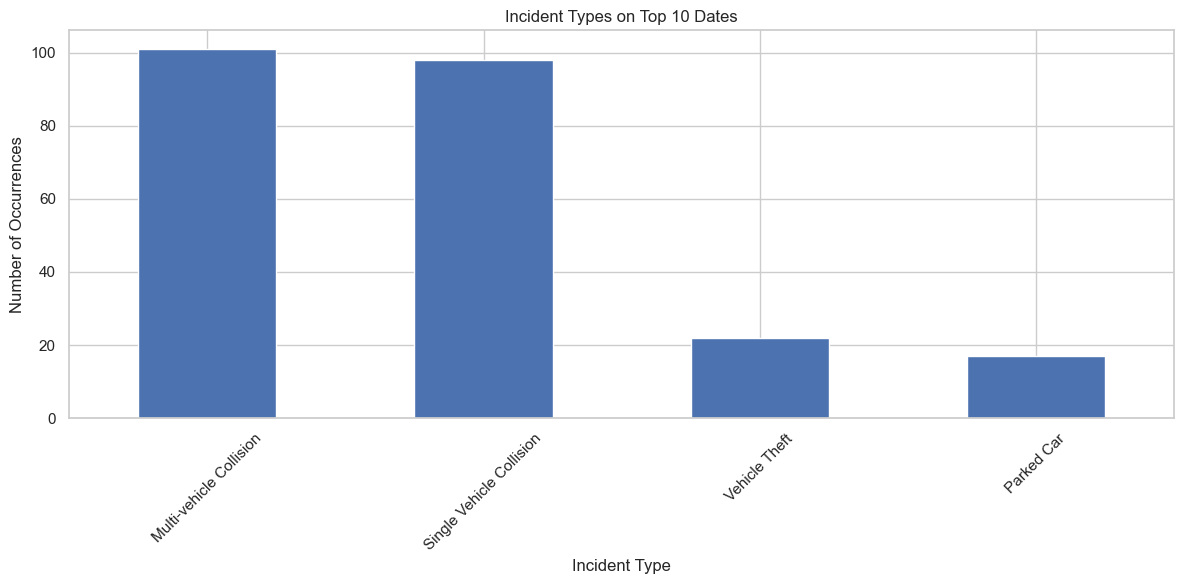

In [159]:


# Convert incident_date column to datetime
df['incident_date'] = pd.to_datetime(df['incident_date'], errors='coerce')

# Set the style for seaborn
sns.set(style="whitegrid")

# Aggregatting data to get counts per date
date_counts = df['incident_date'].value_counts().sort_index()

# Printing summary statistics of incident counts per date
print("Summary Statistics of Incident Counts per Date:")
print(date_counts.describe())

# Printing the first few entries
print("\nFirst few entries of date_counts:")
print(date_counts.head())

# Plotting time series of incidents over time
plt.figure(figsize=(12, 6))
date_counts.plot()
plt.title('Time Series Plot of incident_date')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting monthly counts if dates span multiple years
monthly_counts = df.resample('M', on='incident_date').size()

# Printing summary statistics of monthly counts
print("\nSummary Statistics of Monthly Counts:")
print(monthly_counts.describe())

# Plotting monthly counts
plt.figure(figsize=(12, 6))
monthly_counts.plot()
plt.title('Monthly Time Series Plot of incident_date')
plt.xlabel('Year-Month')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Univariate Analysis on Top 10 Dates with Highest Number of Incidents
# Finding the top 10 dates
top_10_dates = df['incident_date'].value_counts().nlargest(10)
top_10_dates = top_10_dates.sort_index()

# Printing top 10 dates with their counts
print("\nTop 10 Dates with Highest Number of Incidents:")
print(top_10_dates)

# Plotting the top 10 dates
plt.figure(figsize=(12, 6))
top_10_dates.plot(kind='bar')
plt.title('Top 10 Dates with Highest Number of Incidents')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


top_10_data = df[df['incident_date'].isin(top_10_dates.index)]

# Counting of incidents by type for top 10 dates
if 'incident_type' in df.columns:
    incident_type_counts = top_10_data['incident_type'].value_counts()

    # Printing incident type counts
    print("\nIncident Types on Top 10 Dates:")
    print(incident_type_counts)

    plt.figure(figsize=(12, 6))
    incident_type_counts.plot(kind='bar')
    plt.title('Incident Types on Top 10 Dates')
    plt.xlabel('Incident Type')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Bivariate Analysis

We will concentrate on Bivariate Analysis of Features against target variable.

Our aim is to check for statistical significance in correlation between features and target variable.

Various tests will be used, Shapiros, Man-Whitney, Levenes,Independent T tests and Chi-tests (on the categorical variables)

We will then visualize the same

Bivariate Analysis of Numerical Variables against Target Variable 'fraud_reported'


Analyzing Variable: months_as_customer


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


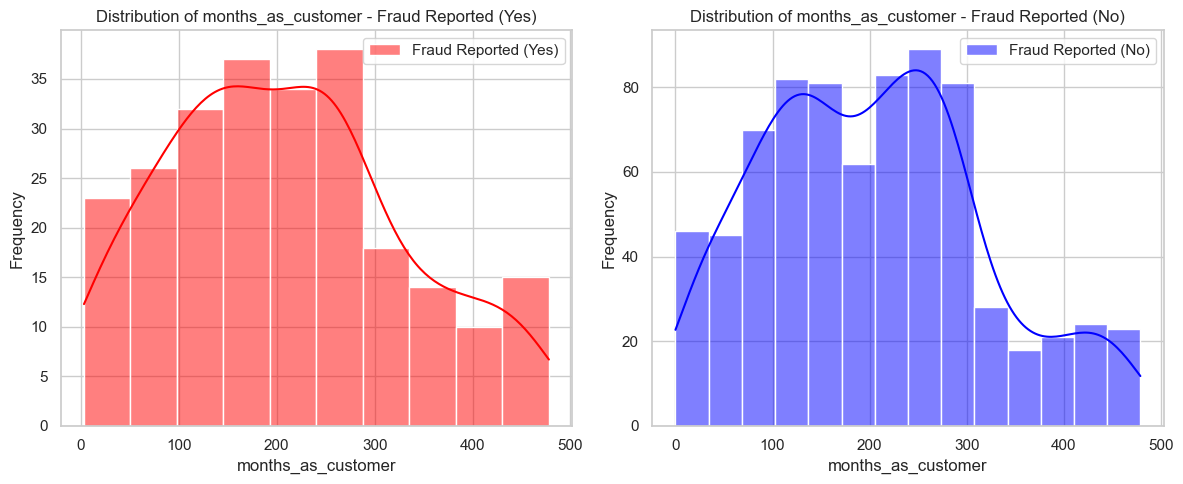

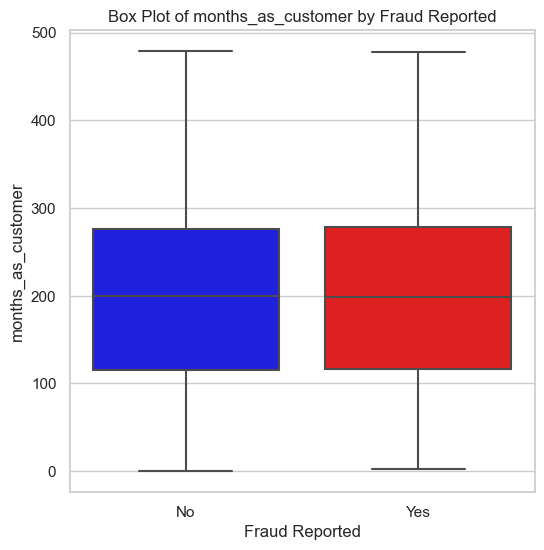

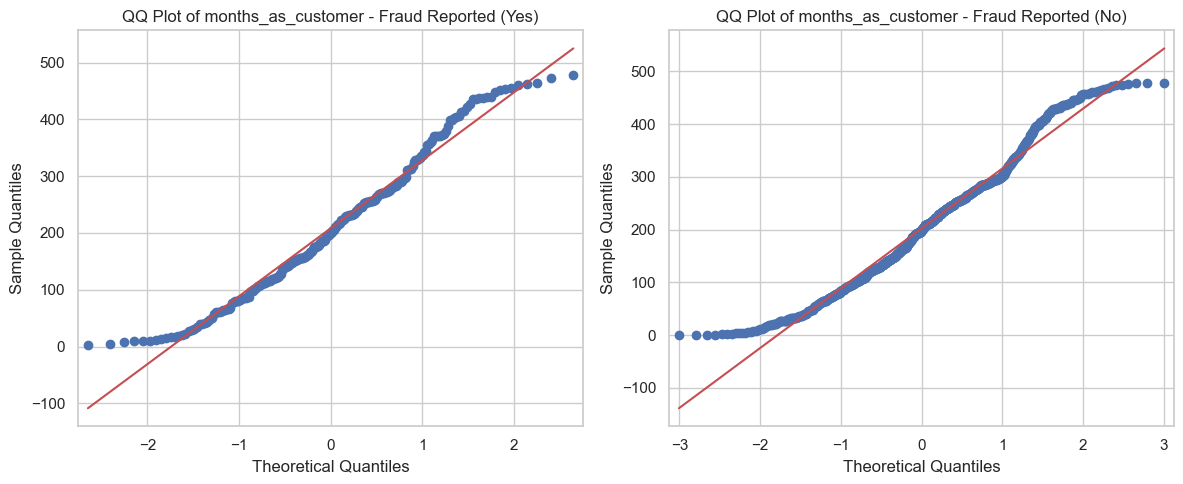

Shapiro-Wilk Test for Normality:
  Fraud Reported (Yes) - W=0.9721, p-value=0.0001
  Fraud Reported (No)  - W=0.9754, p-value=0.0000
Data is not normally distributed. Using Mann-Whitney U test.
Mann-Whitney U Test Results: U=94879.5000, p-value=0.6325
Result: No significant difference in 'months_as_customer' between fraud reported and not reported.

Analyzing Variable: age


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


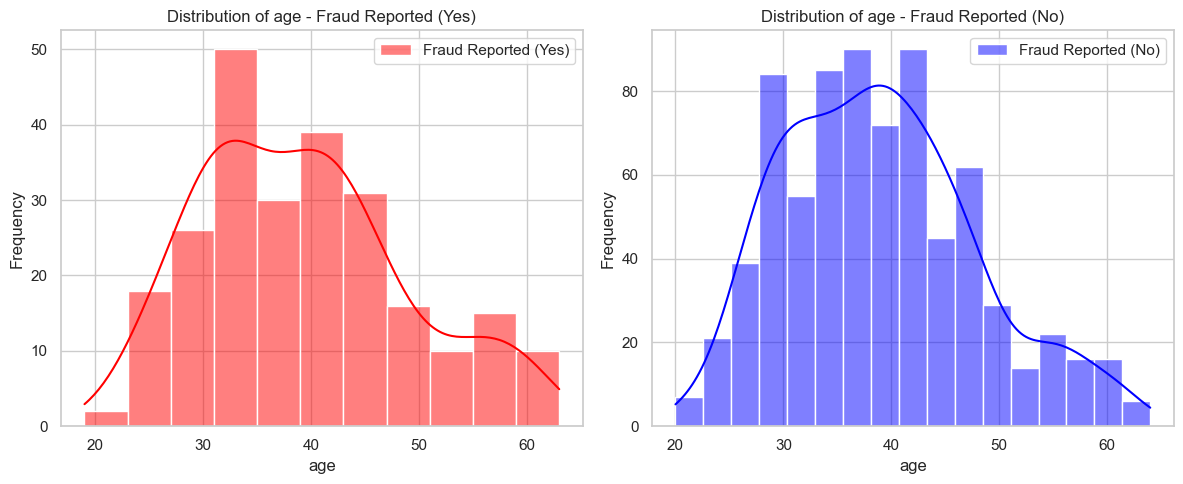

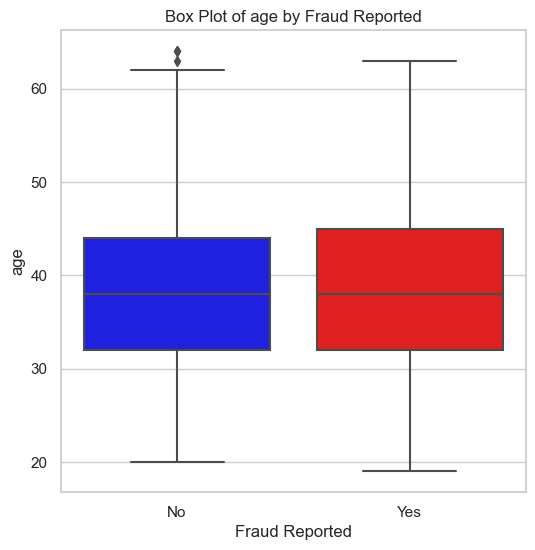

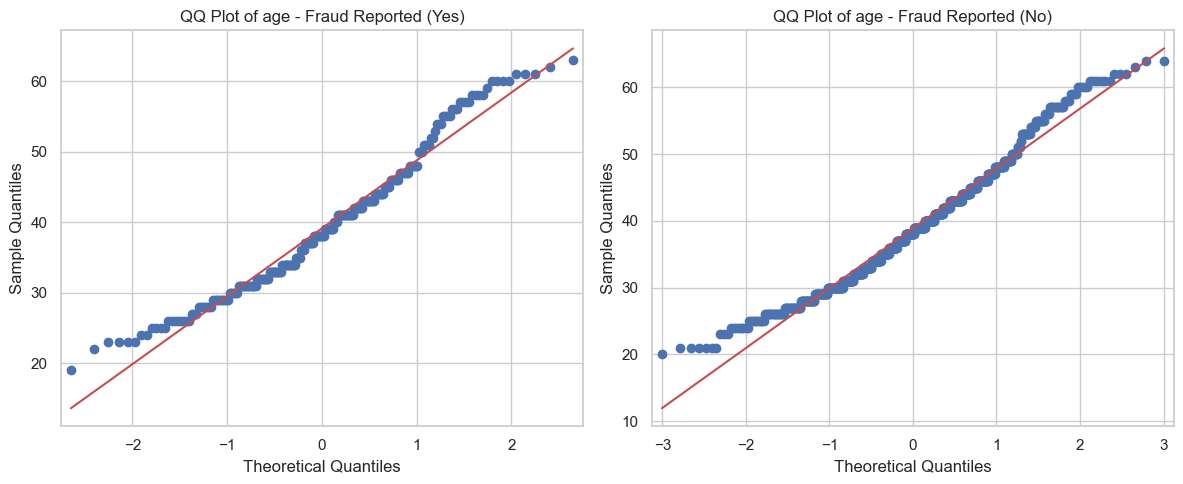

Shapiro-Wilk Test for Normality:
  Fraud Reported (Yes) - W=0.9678, p-value=0.0000
  Fraud Reported (No)  - W=0.9767, p-value=0.0000
Data is not normally distributed. Using Mann-Whitney U test.
Mann-Whitney U Test Results: U=93448.0000, p-value=0.9086
Result: No significant difference in 'age' between fraud reported and not reported.

Analyzing Variable: policy_deductable


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


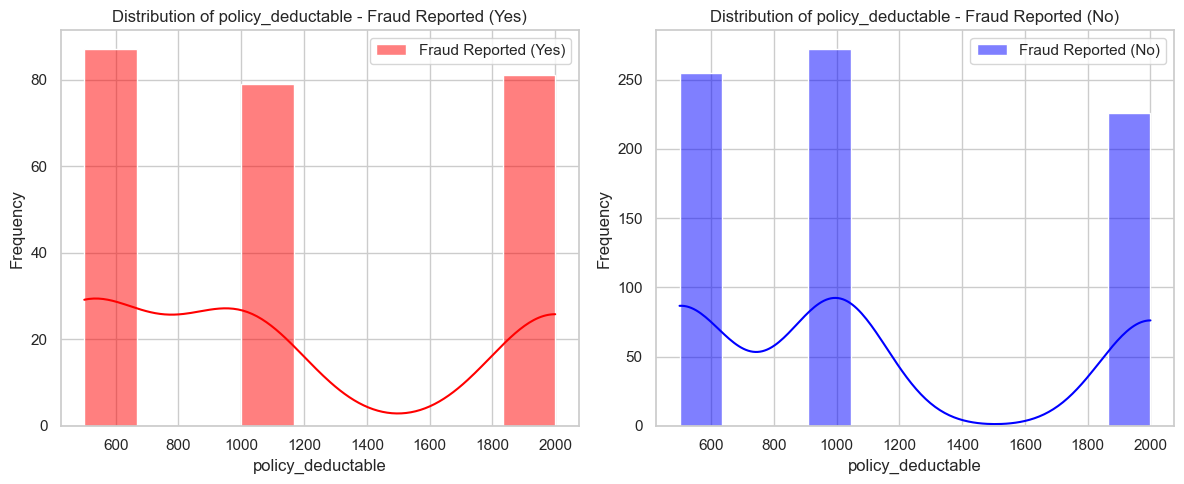

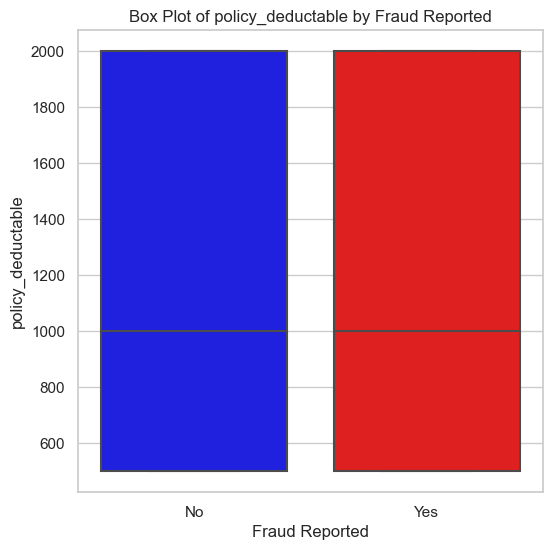

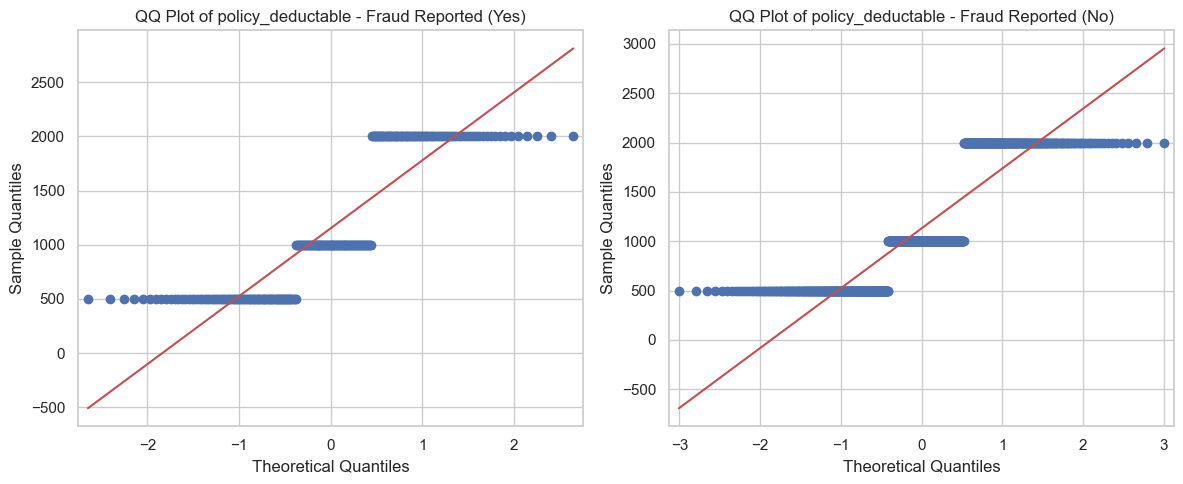

Shapiro-Wilk Test for Normality:
  Fraud Reported (Yes) - W=0.7608, p-value=0.0000
  Fraud Reported (No)  - W=0.7659, p-value=0.0000
Data is not normally distributed. Using Mann-Whitney U test.
Mann-Whitney U Test Results: U=93821.5000, p-value=0.8240
Result: No significant difference in 'policy_deductable' between fraud reported and not reported.

Analyzing Variable: policy_annual_premium


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


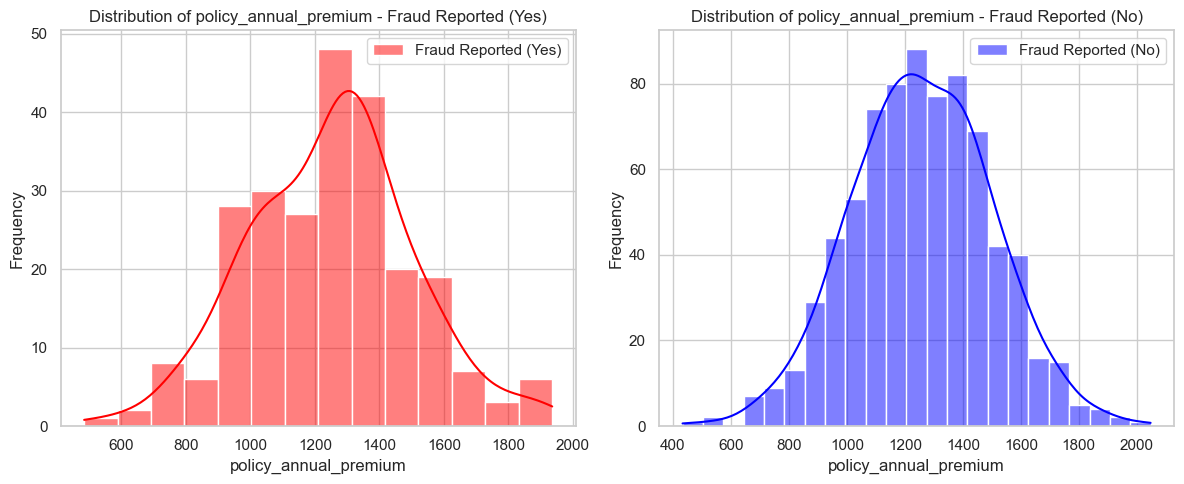

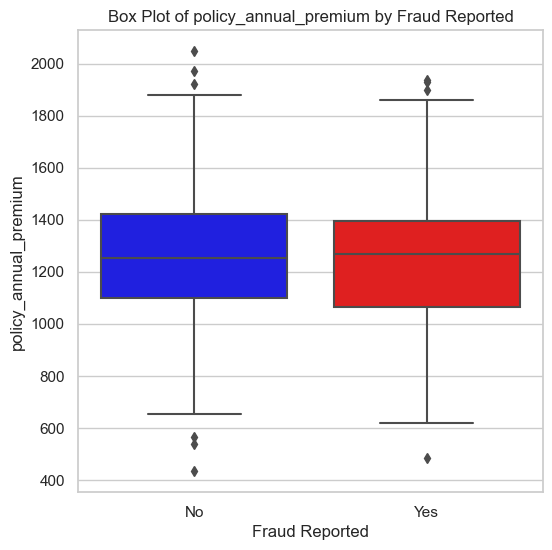

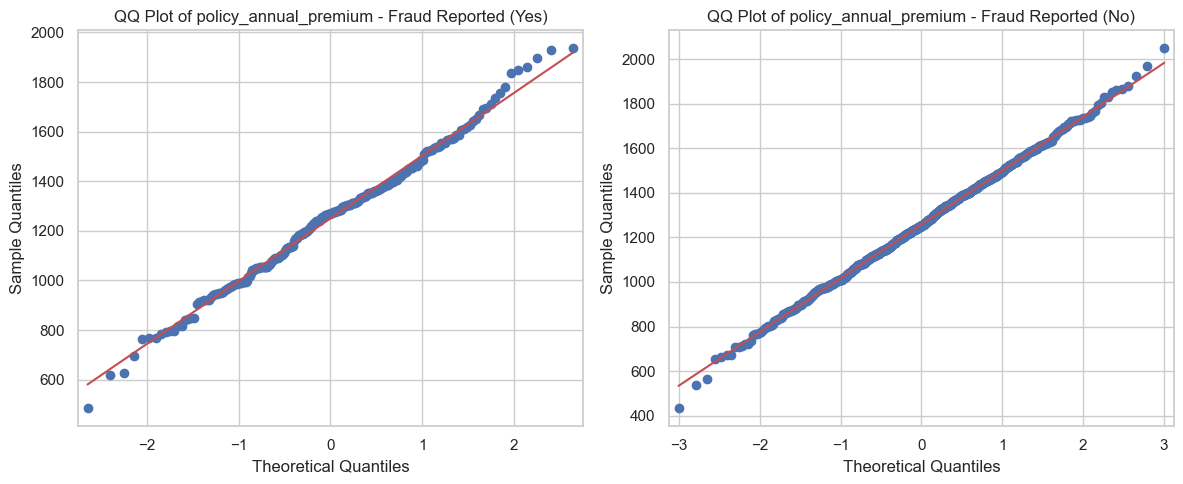

Shapiro-Wilk Test for Normality:
  Fraud Reported (Yes) - W=0.9945, p-value=0.5129
  Fraud Reported (No)  - W=0.9994, p-value=0.9993
Levene's Test for Equality of Variances: W=0.1696, p-value=0.6806
Variances are equal. Using Independent t-test with equal variances.
Independent t-test Results: t=-0.4575, p-value=0.6474
Result: No significant difference in 'policy_annual_premium' between fraud reported and not reported.

Analyzing Variable: umbrella_limit


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


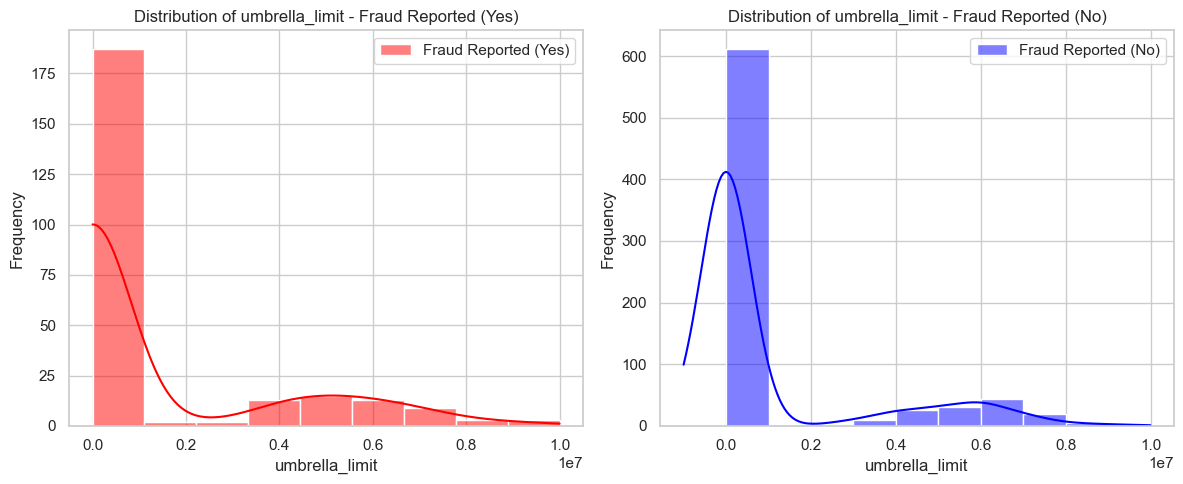

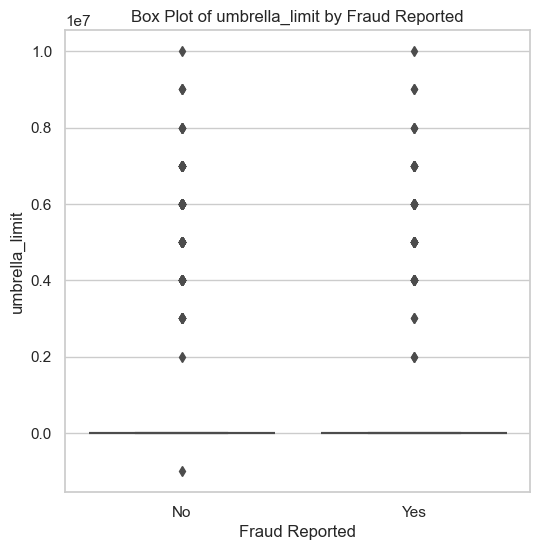

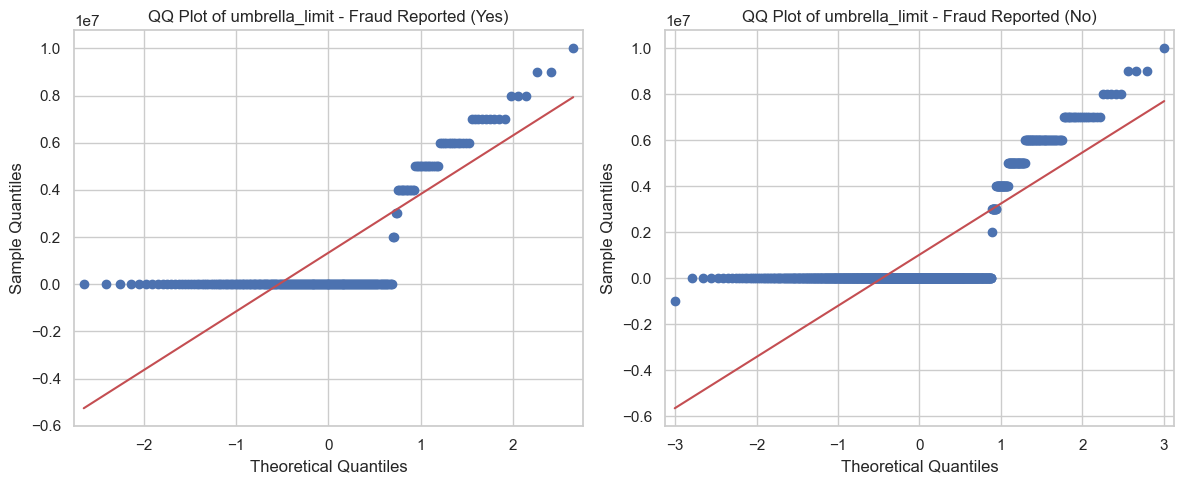

Shapiro-Wilk Test for Normality:
  Fraud Reported (Yes) - W=0.5850, p-value=0.0000
  Fraud Reported (No)  - W=0.5126, p-value=0.0000
Data is not normally distributed. Using Mann-Whitney U test.
Mann-Whitney U Test Results: U=98237.0000, p-value=0.0577
Result: No significant difference in 'umbrella_limit' between fraud reported and not reported.

Analyzing Variable: capital-gains


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


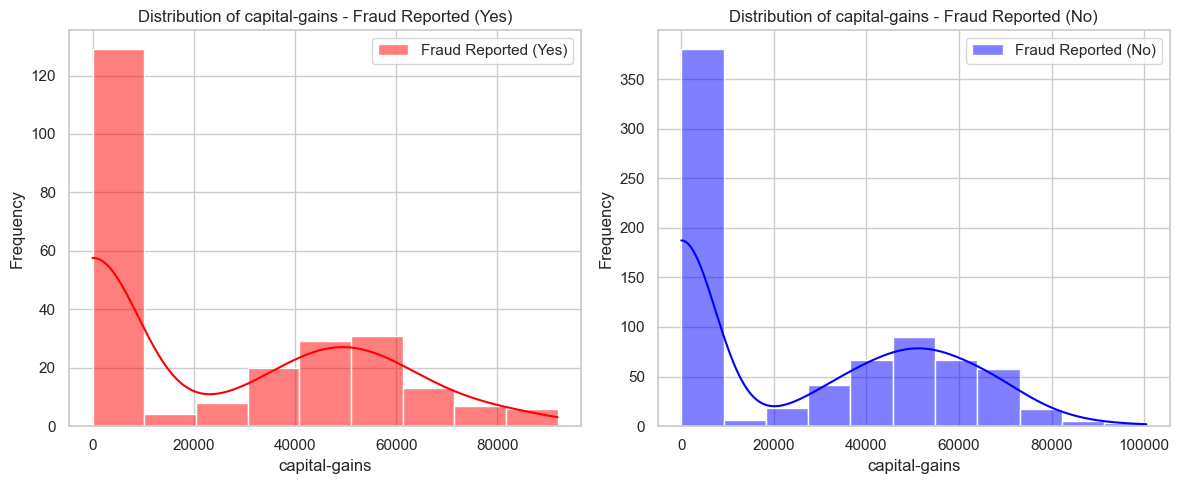

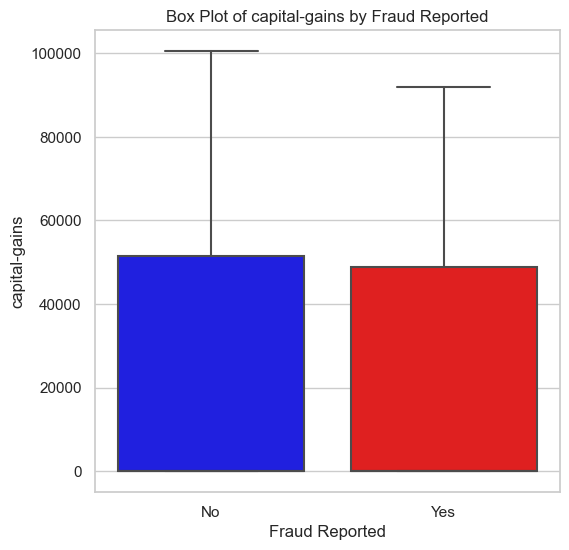

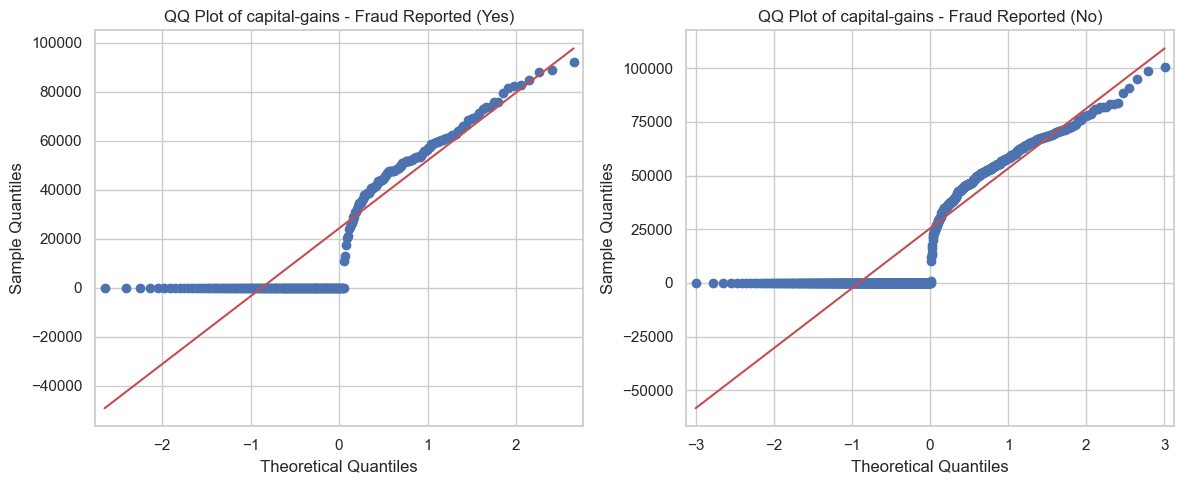

Shapiro-Wilk Test for Normality:
  Fraud Reported (Yes) - W=0.7916, p-value=0.0000
  Fraud Reported (No)  - W=0.7998, p-value=0.0000
Data is not normally distributed. Using Mann-Whitney U test.
Mann-Whitney U Test Results: U=90587.0000, p-value=0.5119
Result: No significant difference in 'capital-gains' between fraud reported and not reported.

Analyzing Variable: capital-loss


c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FLEX 5\anaconda03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


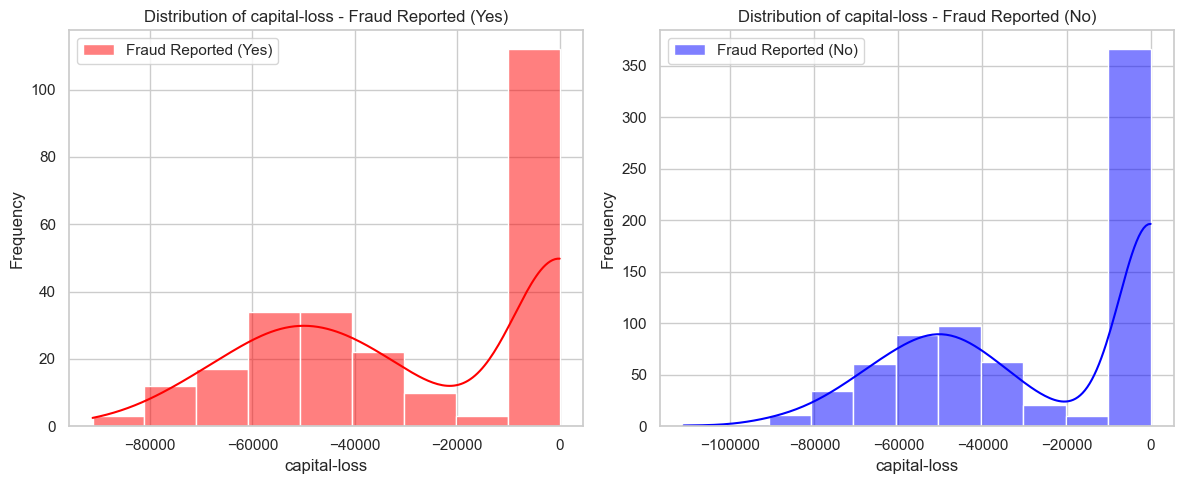

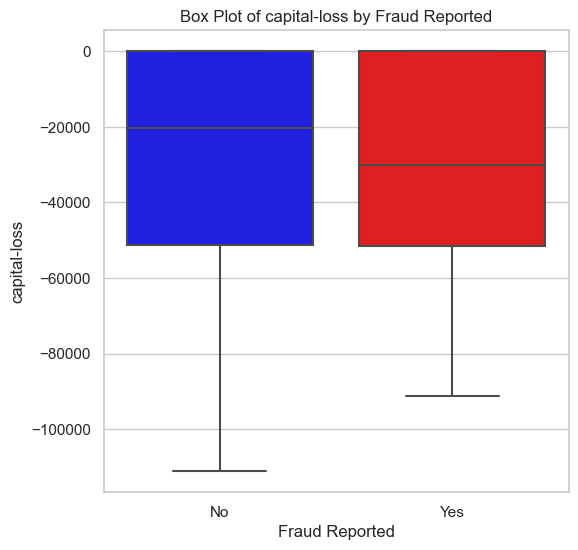

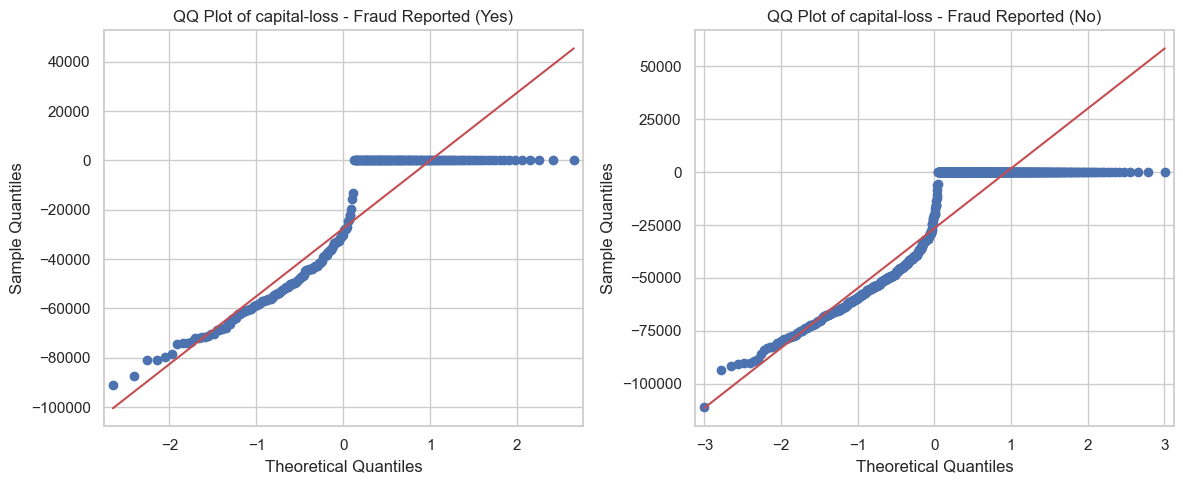

Shapiro-Wilk Test for Normality:
  Fraud Reported (Yes) - W=0.8281, p-value=0.0000
  Fraud Reported (No)  - W=0.8140, p-value=0.0000
Data is not normally distributed. Using Mann-Whitney U test.
Mann-Whitney U Test Results: U=91188.0000, p-value=0.6273
Result: No significant difference in 'capital-loss' between fraud reported and not reported.

Summary of Significant Variables:
No numerical variables showed significant differences between fraud reported and not reported.


In [160]:

# Identifying the target variable
target = 'fraud_reported'

# Converting 'fraud_reported' to a binary variable 
df[target] = df[target].map({'Y': 1, 'N': 0})

# Listing of numerical variables (excluding identifiers and non-informative variables)
numerical_vars = [
    'months_as_customer',
    'age',
    'policy_deductable',
    'policy_annual_premium',
    'umbrella_limit',
    'capital-gains',
    'capital-loss'
]

#  Bivariate Analysis
print("Bivariate Analysis of Numerical Variables against Target Variable 'fraud_reported'\n")

significant_vars = []

for var in numerical_vars:
    if var not in df.columns:
        print(f"Variable '{var}' not found in DataFrame, skipping.")
        continue

    print(f"\nAnalyzing Variable: {var}")

    # Extracting data for each group
    group_fraud = df[df[target] == 1][var].dropna()
    group_no_fraud = df[df[target] == 0][var].dropna()

    # Checking for sufficient data
    if group_fraud.empty or group_no_fraud.empty:
        print(f"Not enough data in one of the groups for variable '{var}', skipping.")
        continue

    # Plotting histograms for both groups
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(group_fraud, kde=True, color='red', label='Fraud Reported (Yes)')
    plt.title(f'Distribution of {var} - Fraud Reported (Yes)')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.histplot(group_no_fraud, kde=True, color='blue', label='Fraud Reported (No)')
    plt.title(f'Distribution of {var} - Fraud Reported (No)')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Box plotting comparing the two groups
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=target, y=var, data=df, palette=['blue', 'red'])
    plt.title(f'Box Plot of {var} by Fraud Reported')
    plt.xlabel('Fraud Reported')
    plt.ylabel(var)
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()

    # QQ plots for normality assessment
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sm.qqplot(group_fraud, line='s', ax=axes[0])
    axes[0].set_title(f'QQ Plot of {var} - Fraud Reported (Yes)')

    sm.qqplot(group_no_fraud, line='s', ax=axes[1])
    axes[1].set_title(f'QQ Plot of {var} - Fraud Reported (No)')

    plt.tight_layout()
    plt.show()

    # Test for normality using Shapiro-Wilk Test
    stat_fraud, p_fraud = stats.shapiro(group_fraud)
    stat_no_fraud, p_no_fraud = stats.shapiro(group_no_fraud)

    print("Shapiro-Wilk Test for Normality:")
    print(f"  Fraud Reported (Yes) - W={stat_fraud:.4f}, p-value={p_fraud:.4f}")
    print(f"  Fraud Reported (No)  - W={stat_no_fraud:.4f}, p-value={p_no_fraud:.4f}")

    # Deciding on statistical test based on normality
    alpha = 0.05
    normal_fraud = p_fraud > alpha
    normal_no_fraud = p_no_fraud > alpha

    if normal_fraud and normal_no_fraud:
        # Testing for equality of variances using Levene's Test
        stat_levene, p_levene = stats.levene(group_fraud, group_no_fraud)
        equal_var = p_levene > alpha
        print(f"Levene's Test for Equality of Variances: W={stat_levene:.4f}, p-value={p_levene:.4f}")

        if equal_var:
            print("Variances are equal. Using Independent t-test with equal variances.")
        else:
            print("Variances are not equal. Using Independent t-test with unequal variances.")

        # Perform Independent t-test
        stat_ttest, p_ttest = stats.ttest_ind(group_fraud, group_no_fraud, equal_var=equal_var)
        print(f"Independent t-test Results: t={stat_ttest:.4f}, p-value={p_ttest:.4f}")

        if p_ttest < alpha:
            print(f"Result: Significant difference in '{var}' between fraud reported and not reported.")
            significant_vars.append(var)
        else:
            print(f"Result: No significant difference in '{var}' between fraud reported and not reported.")
    else:
        # Use Mann-Whitney U test for non-normal distributions
        stat_mw, p_mw = stats.mannwhitneyu(group_fraud, group_no_fraud, alternative='two-sided')
        print("Data is not normally distributed. Using Mann-Whitney U test.")
        print(f"Mann-Whitney U Test Results: U={stat_mw:.4f}, p-value={p_mw:.4f}")

        if p_mw < alpha:
            print(f"Result: Significant difference in '{var}' between fraud reported and not reported.")
            significant_vars.append(var)
        else:
            print(f"Result: No significant difference in '{var}' between fraud reported and not reported.")

# Summary of Significant Variables
print("\nSummary of Significant Variables:")
if significant_vars:
    print("Variables showing significant differences between fraud reported and not reported:")
    for var in significant_vars:
        print(f" - {var}")
else:
    print("No numerical variables showed significant differences between fraud reported and not reported.")
